In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('CO2 dataset.xlsx',parse_dates = True)

In [3]:
data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [4]:
data.tail()

,Year,CO2
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [6]:
data.shape

(215, 2)

In [7]:
data["CO2"].describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

In [8]:
data["CO2"].var()

42.542182508244835

In [9]:
data["CO2"].skew()

0.3627361392624211

In [10]:
data["CO2"].kurt()

-1.4172721357022504

<AxesSubplot:ylabel='Density'>

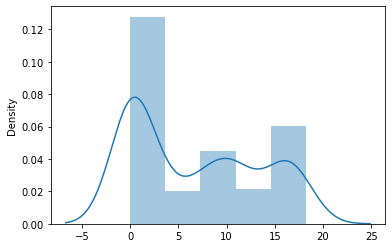

In [11]:
sns.distplot(x=data['CO2'],kde=True)

<AxesSubplot:>

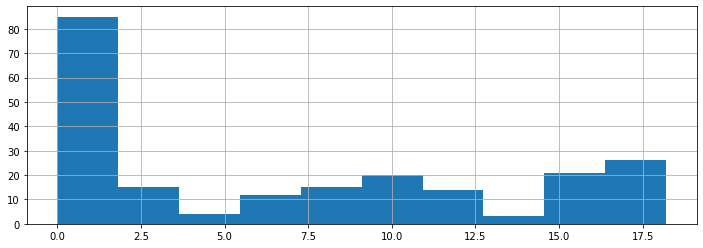

In [12]:
data["CO2"].hist(figsize=(12,4))

<AxesSubplot:xlabel='Year', ylabel='CO2'>

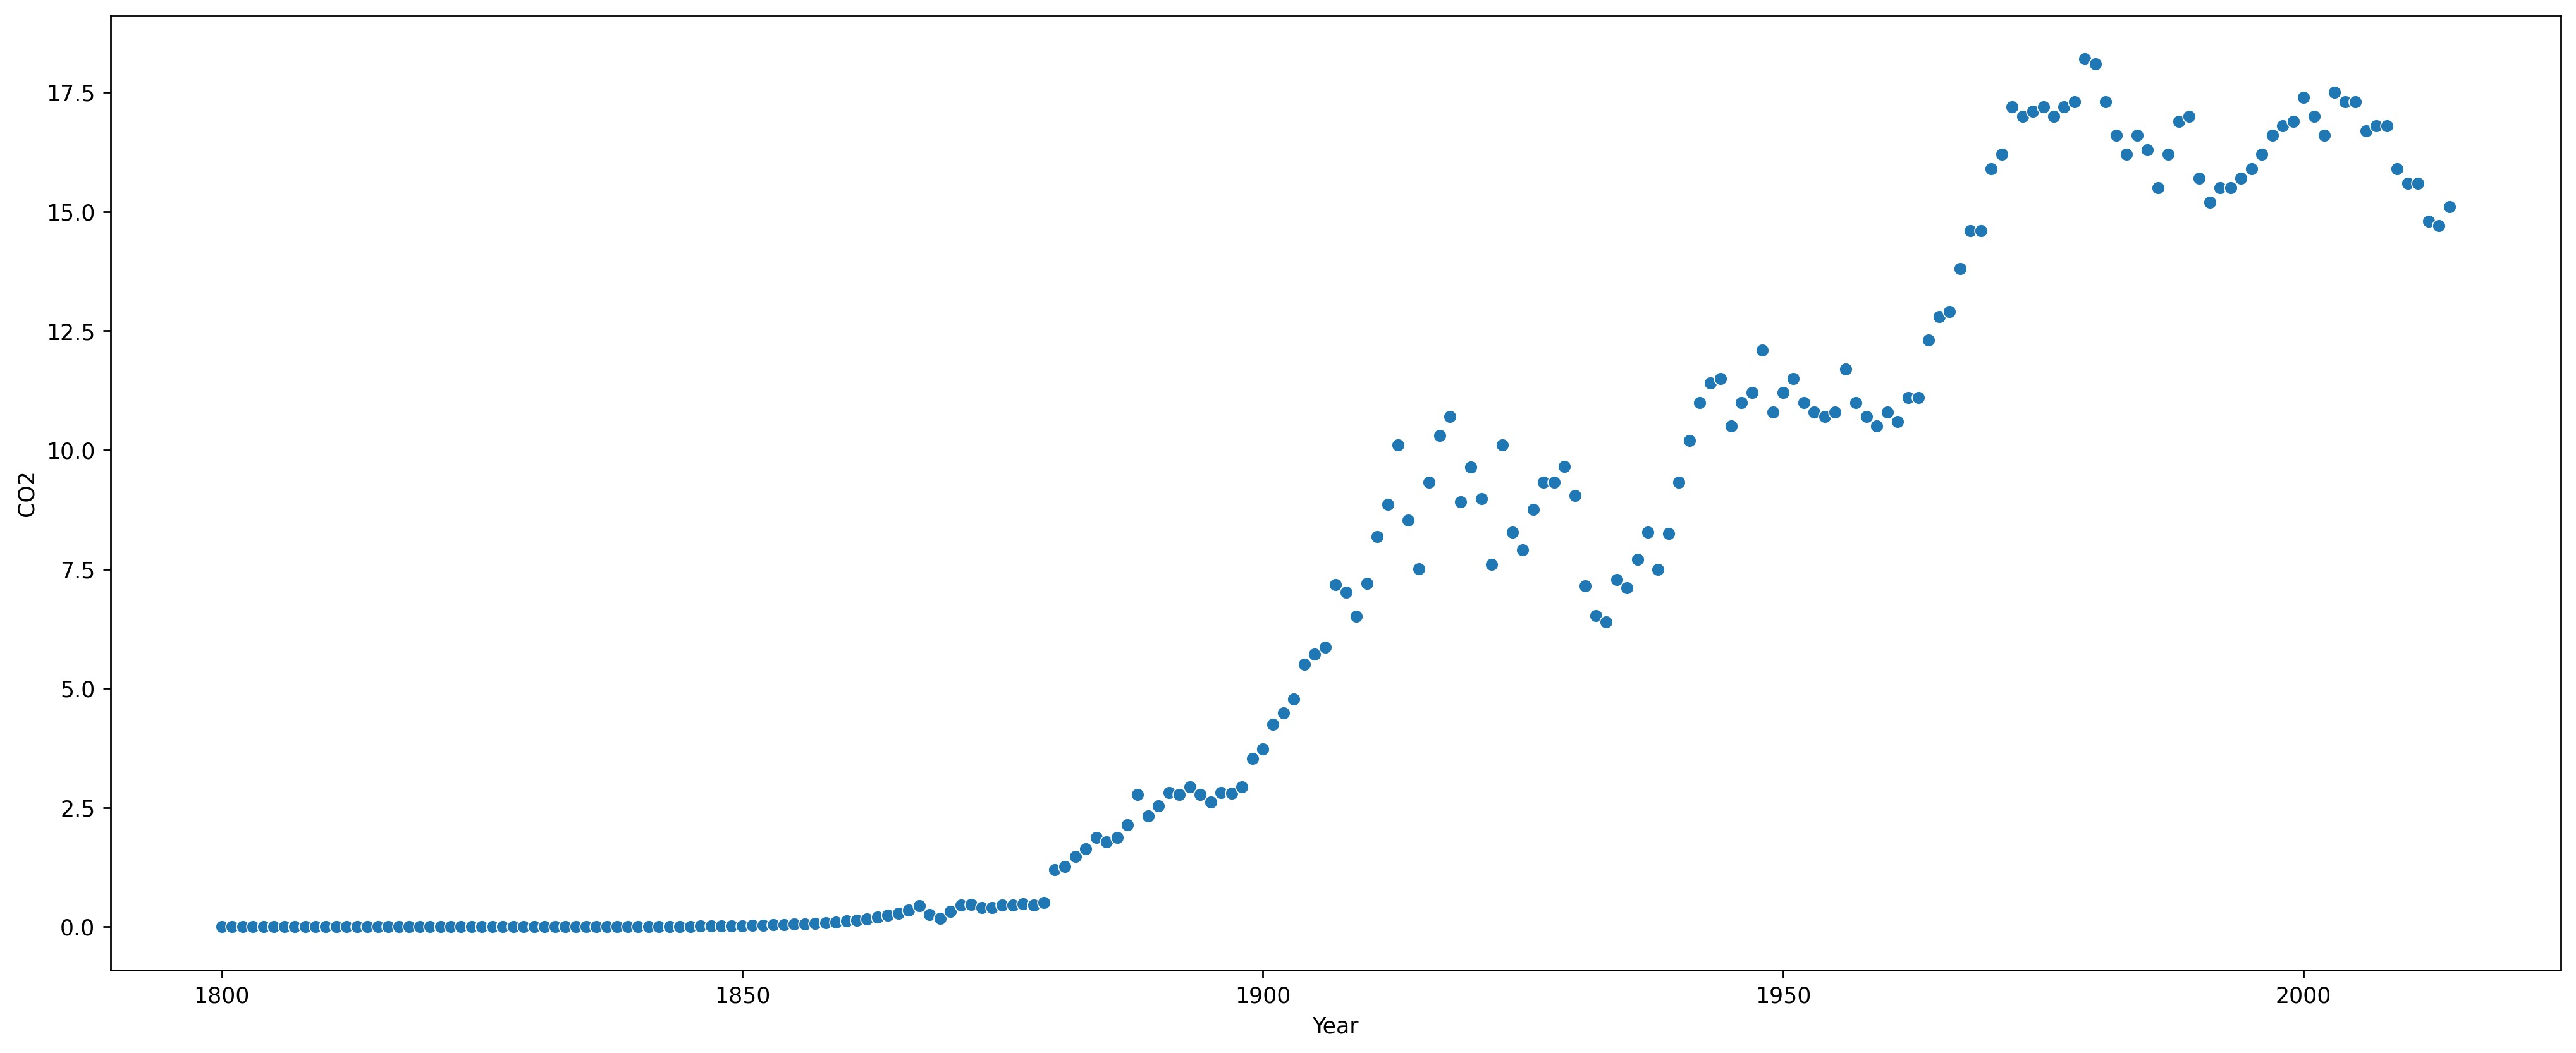

In [13]:
plt.figure(figsize=(20,8),dpi=250)
sns.scatterplot(x="Year",y="CO2",data=data)

In [14]:
data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


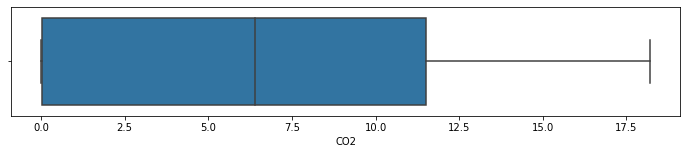

In [17]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['CO2'])

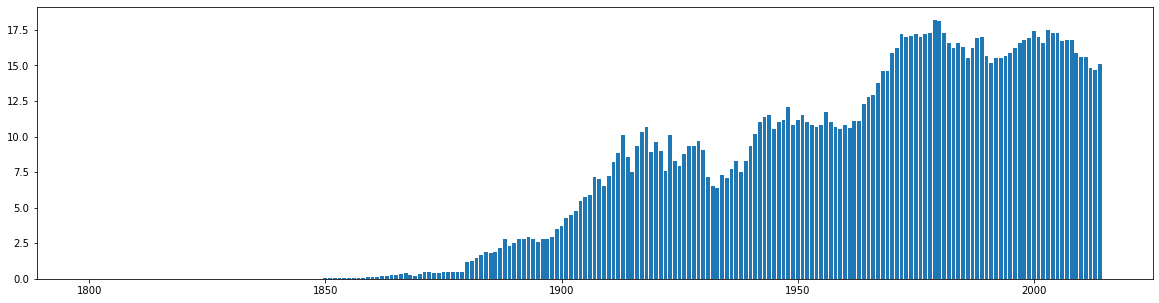

In [18]:
plt.figure(figsize=(20,5))
plt.bar(data["Year"],data["CO2"])
plt.show()

In [19]:
data["CO2"].min()

0.00175

In [20]:
data["CO2"].max()

18.2

In [21]:
display(data[data.CO2==data.CO2.min()],
      data[data.CO2==data.CO2.max()])

,Year,CO2
45,1845,0.00175


,Year,CO2
179,1979,18.2


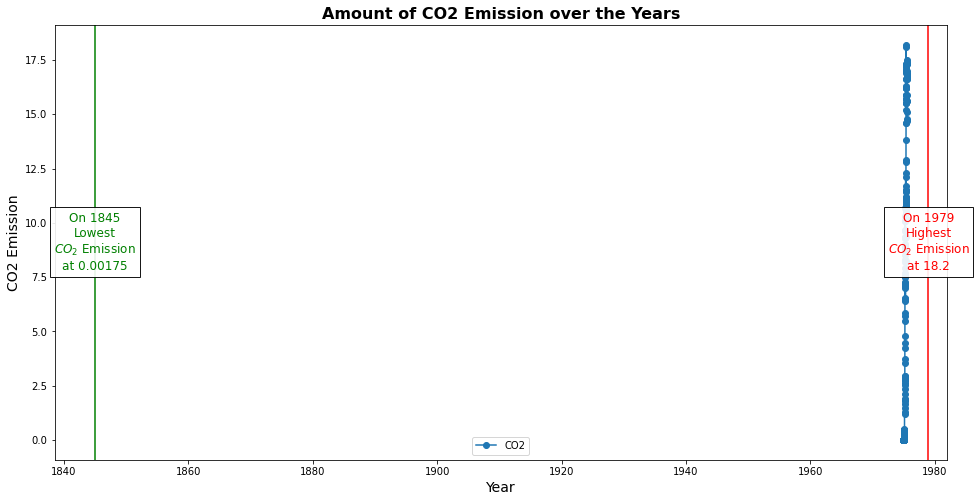

In [22]:
data.plot(kind ='line',x = 'Year', y = 'CO2', figsize = (16,8), marker = 'o')

plt.title('Amount of CO2 Emission over the Years', fontdict={'fontsize': 16,'fontweight':'bold'})
plt.ylabel('CO2 Emission', fontdict={'fontsize': 14})
plt.xlabel('Year', fontdict={'fontsize': 14})

label_list = [
    (pd.to_datetime("1845"), 'On 1845\nLowest\n$CO_2$ Emission\nat 0.00175', 'g'),
    (pd.to_datetime("1979"), "On 1979\nHighest\n$CO_2$ Emission\nat 18.2", 'r')
]

ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-10, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9),fontsize=12)

plt.show()

In [23]:
data.columns = ["Year", 'CO2']
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.set_index('Year')
data.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [25]:
data1 = data.copy()

In [26]:
upsampled_month = data.copy()
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                CO2
Year               
1800-01-31  0.00568
1800-02-28      NaN
1800-03-31      NaN
1800-04-30      NaN
1800-05-31      NaN
1800-06-30      NaN
1800-07-31      NaN
1800-08-31      NaN
1800-09-30      NaN
1800-10-31      NaN
1800-11-30      NaN
1800-12-31      NaN
1801-01-31  0.00561


                 CO2
Year                
1800-01-31  0.005680
1800-02-28  0.005674
1800-03-31  0.005668
1800-04-30  0.005662
1800-05-31  0.005657
1800-06-30  0.005651
1800-07-31  0.005645
1800-08-31  0.005639
1800-09-30  0.005633
1800-10-31  0.005628
1800-11-30  0.005622
1800-12-31  0.005616
1801-01-31  0.005610
1801-02-28  0.005605
1801-03-31  0.005600


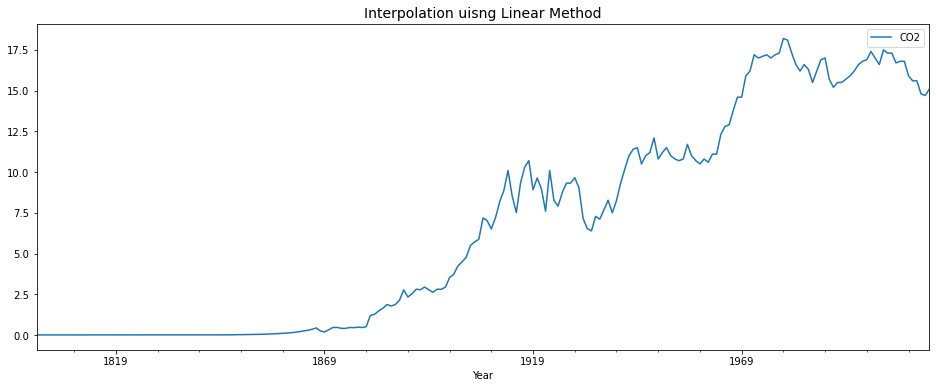

In [27]:
interpolated_month = upsampled_month.interpolate(method='linear') 
print(interpolated_month.head(15))
interpolated_month.plot(figsize=(16,6))
plt.title("Interpolation uisng Linear Method", fontsize =  14)
plt.show()

In [28]:
interpolated_month.duplicated(keep=False).sum()

704

In [29]:
interpolated_month[interpolated_month.duplicated(keep=False)]

,CO2
Year,
1866-07-31,0.391000
1870-07-31,0.391000
1871-01-31,0.461000
1871-09-30,0.467667
1875-01-31,0.461000
...,...
2013-02-28,14.733333
2013-08-31,14.933333
2013-10-31,15.000000


In [30]:
interpolated_month

,CO2
Year,
1800-01-31,0.005680
1800-02-28,0.005674
1800-03-31,0.005668
1800-04-30,0.005662
1800-05-31,0.005657
...,...
2013-09-30,14.966667
2013-10-31,15.000000
2013-11-30,15.033333


                 CO2
Year                
1800-01-31  0.005680
1800-02-28  0.005675
1800-03-31  0.005669
1800-04-30  0.005663
1800-05-31  0.005657
1800-06-30  0.005651
1800-07-31  0.005645
1800-08-31  0.005639
1800-09-30  0.005634
1800-10-31  0.005628
1800-11-30  0.005622
1800-12-31  0.005616
1801-01-31  0.005610
1801-02-28  0.005605
1801-03-31  0.005600


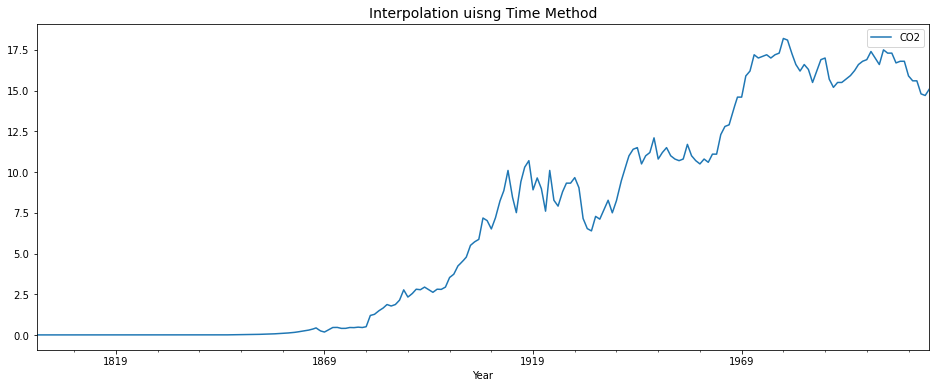

In [31]:
time = upsampled_month.interpolate(method='time')
print(time.head(15))
time.plot(figsize=(16,6))
plt.title("Interpolation uisng Time Method", fontsize =  14)
plt.show()

In [32]:
visual = time.copy()
visual.reset_index(inplace=True)
visual['Year'] = pd.to_datetime(visual['Year'])
visual['year'] = visual['Year'].dt.year
visual['month'] = visual['Year'].dt.month
visual['week'] = visual['Year'].dt.isocalendar().week
visual['quarter'] = visual['Year'].dt.quarter
visual['day_of_week'] = visual['Year'].dt.day_name()
visual.drop('Year', axis =1 , inplace= True)
visual[:10]

,CO2,year,month,week,quarter,day_of_week
0,0.005680,1800,1,5,1,Friday
1,0.005675,1800,2,9,1,Friday
2,0.005669,1800,3,14,1,Monday
3,0.005663,1800,4,18,2,Wednesday
4,0.005657,1800,5,22,2,Saturday
5,0.005651,1800,6,27,2,Monday
6,0.005645,1800,7,31,3,Thursday
7,0.005639,1800,8,35,3,Sunday
8,0.005634,1800,9,40,3,Tuesday
9,0.005628,1800,10,44,4,Friday


<AxesSubplot:xlabel='year', ylabel='CO2'>

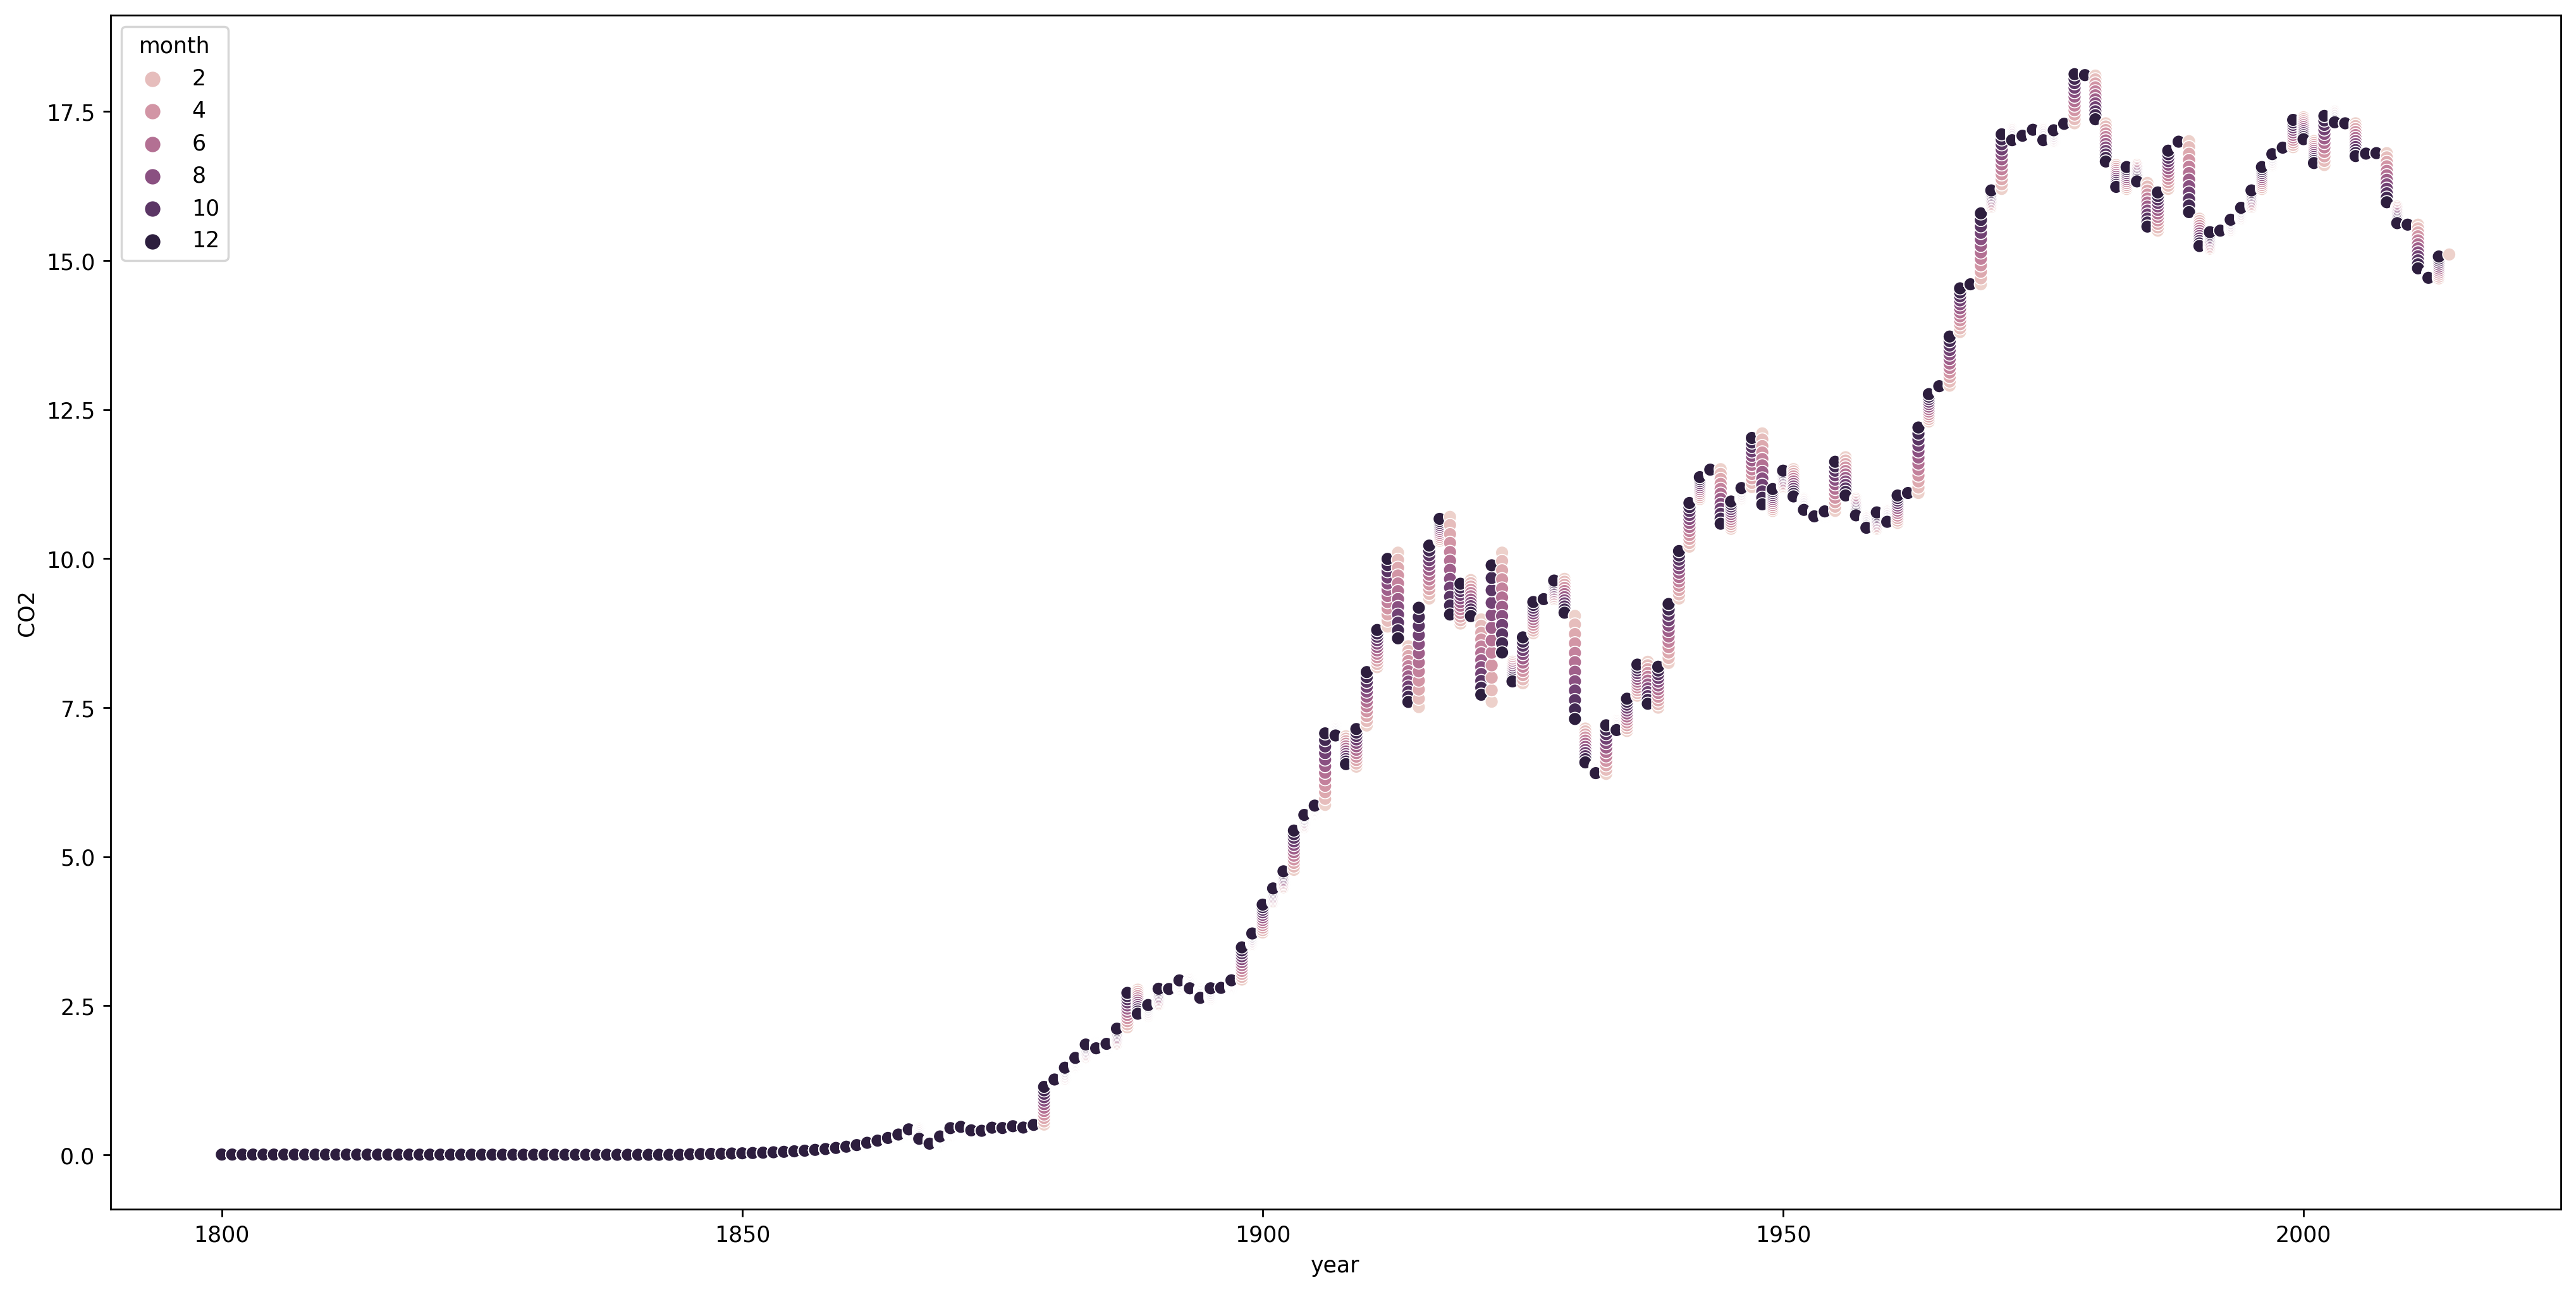

In [33]:
plt.figure(figsize=(20,10),dpi=250)
sns.scatterplot(x="year",y="CO2",hue='month',data=visual)

<AxesSubplot:xlabel='month', ylabel='CO2'>

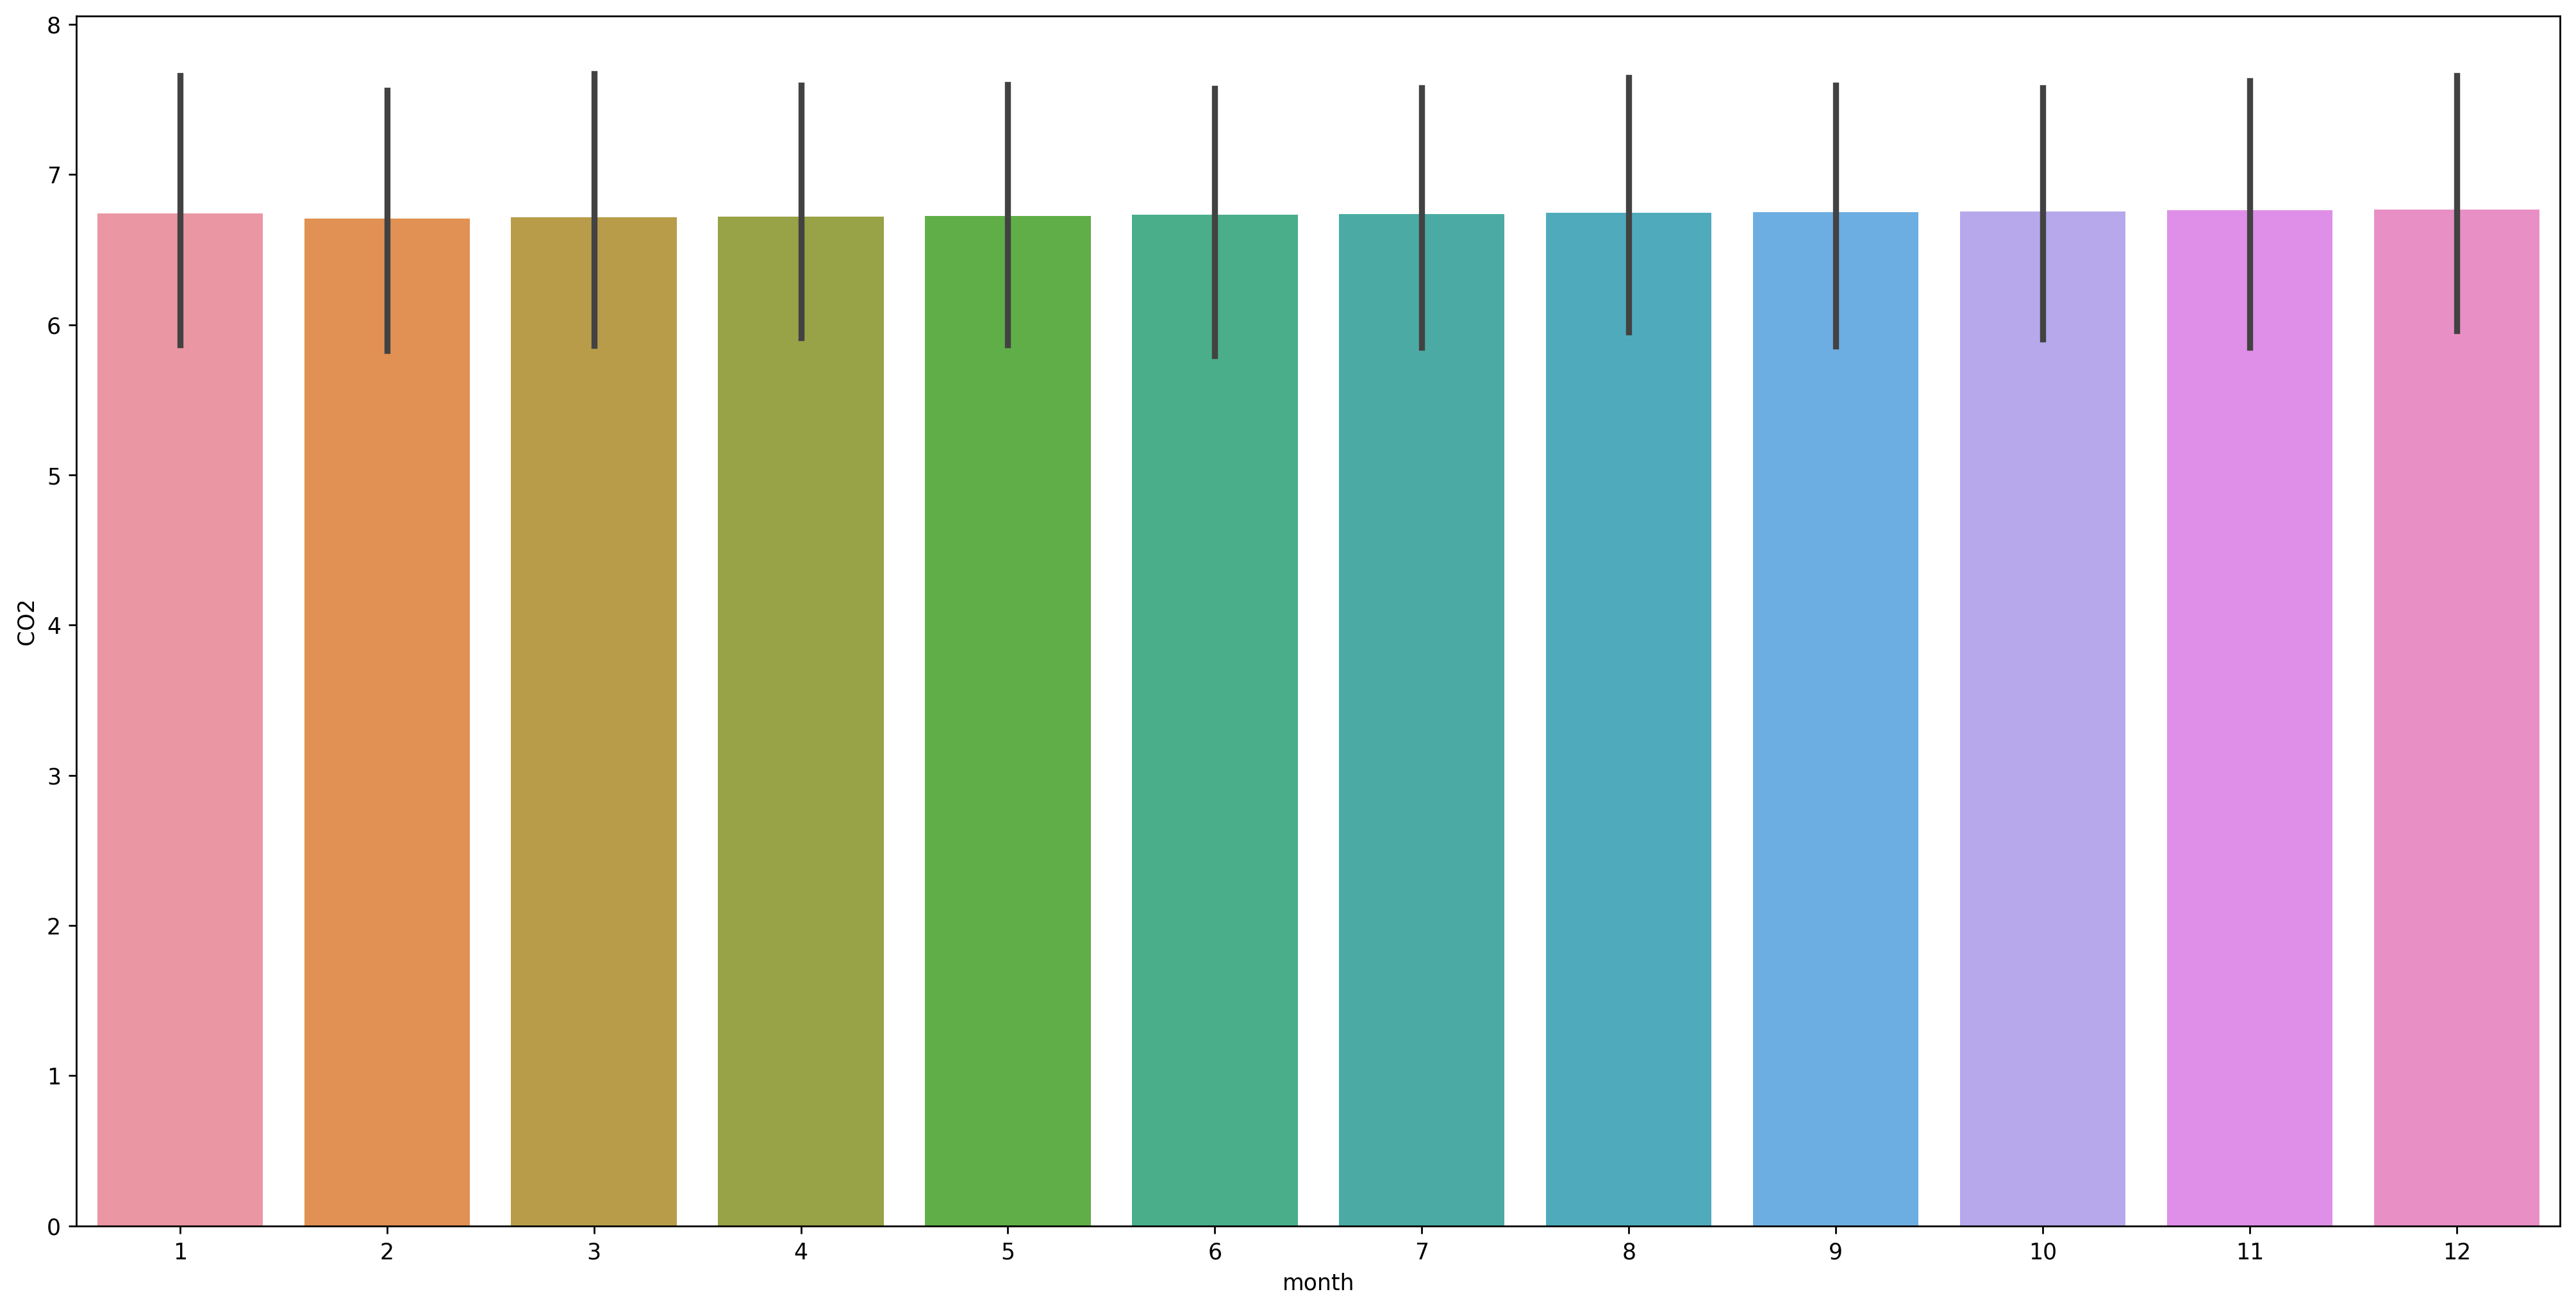

In [34]:
plt.figure(figsize=(20,10),dpi=250)
sns.barplot('month',"CO2",data=visual)

<AxesSubplot:xlabel='week', ylabel='CO2'>

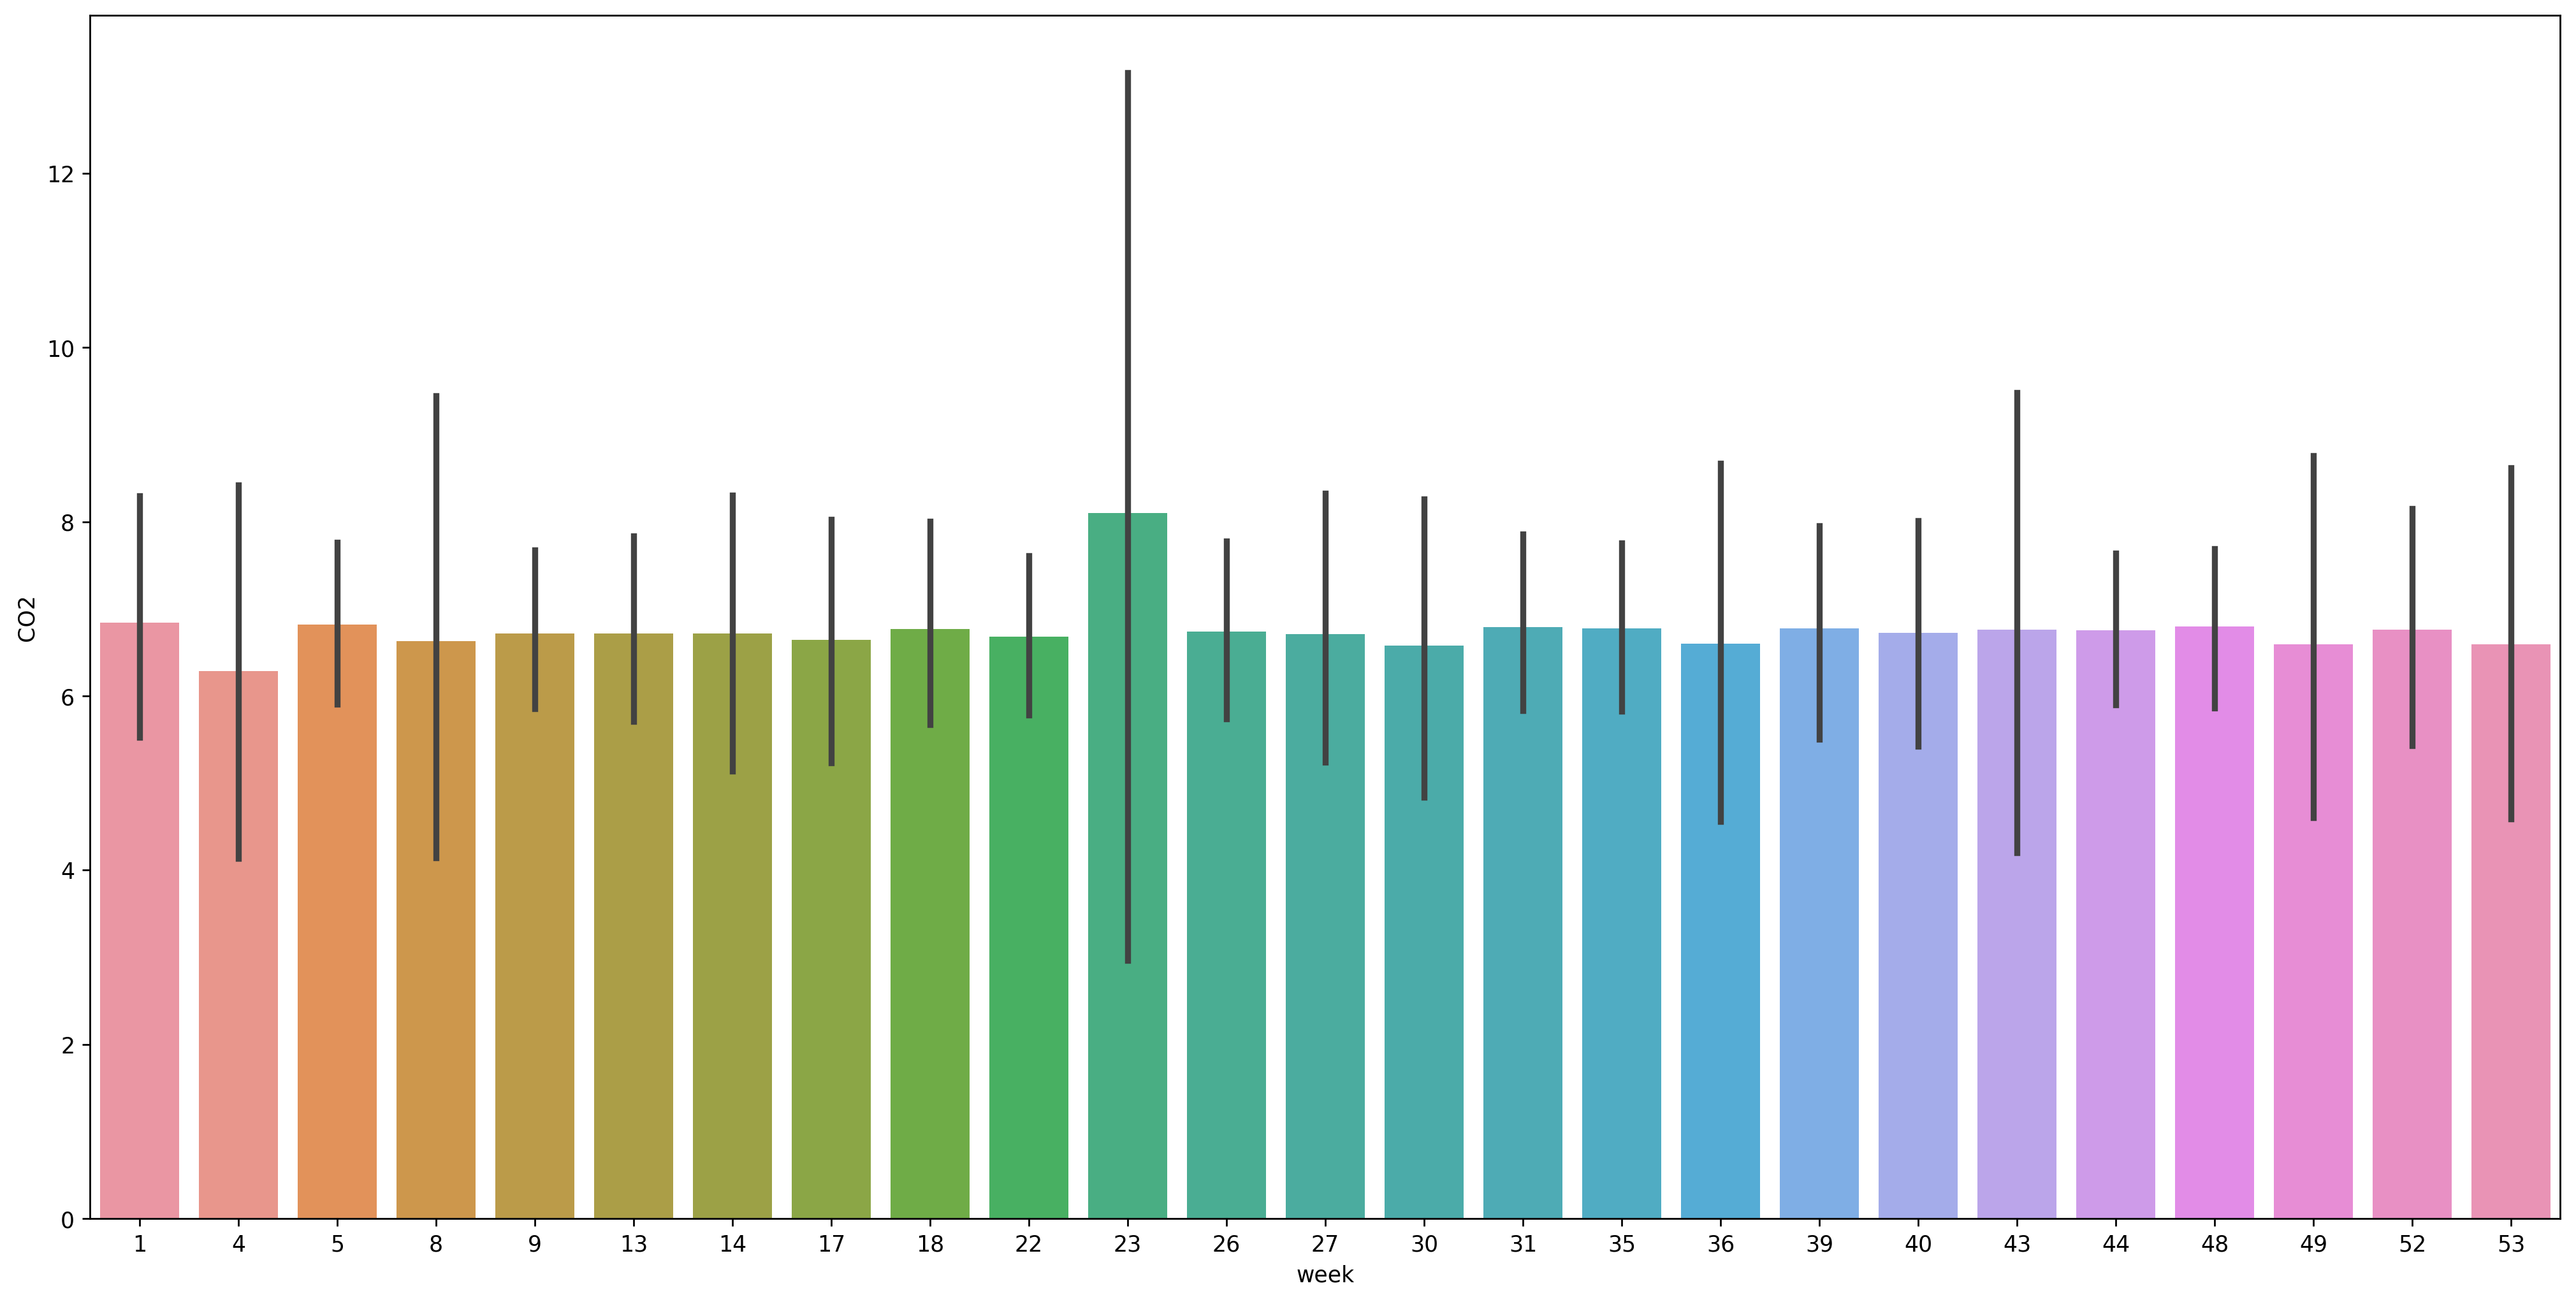

In [35]:
plt.figure(figsize=(20,10),dpi=250)
sns.barplot('week',"CO2",data=visual)

<AxesSubplot:xlabel='quarter', ylabel='CO2'>

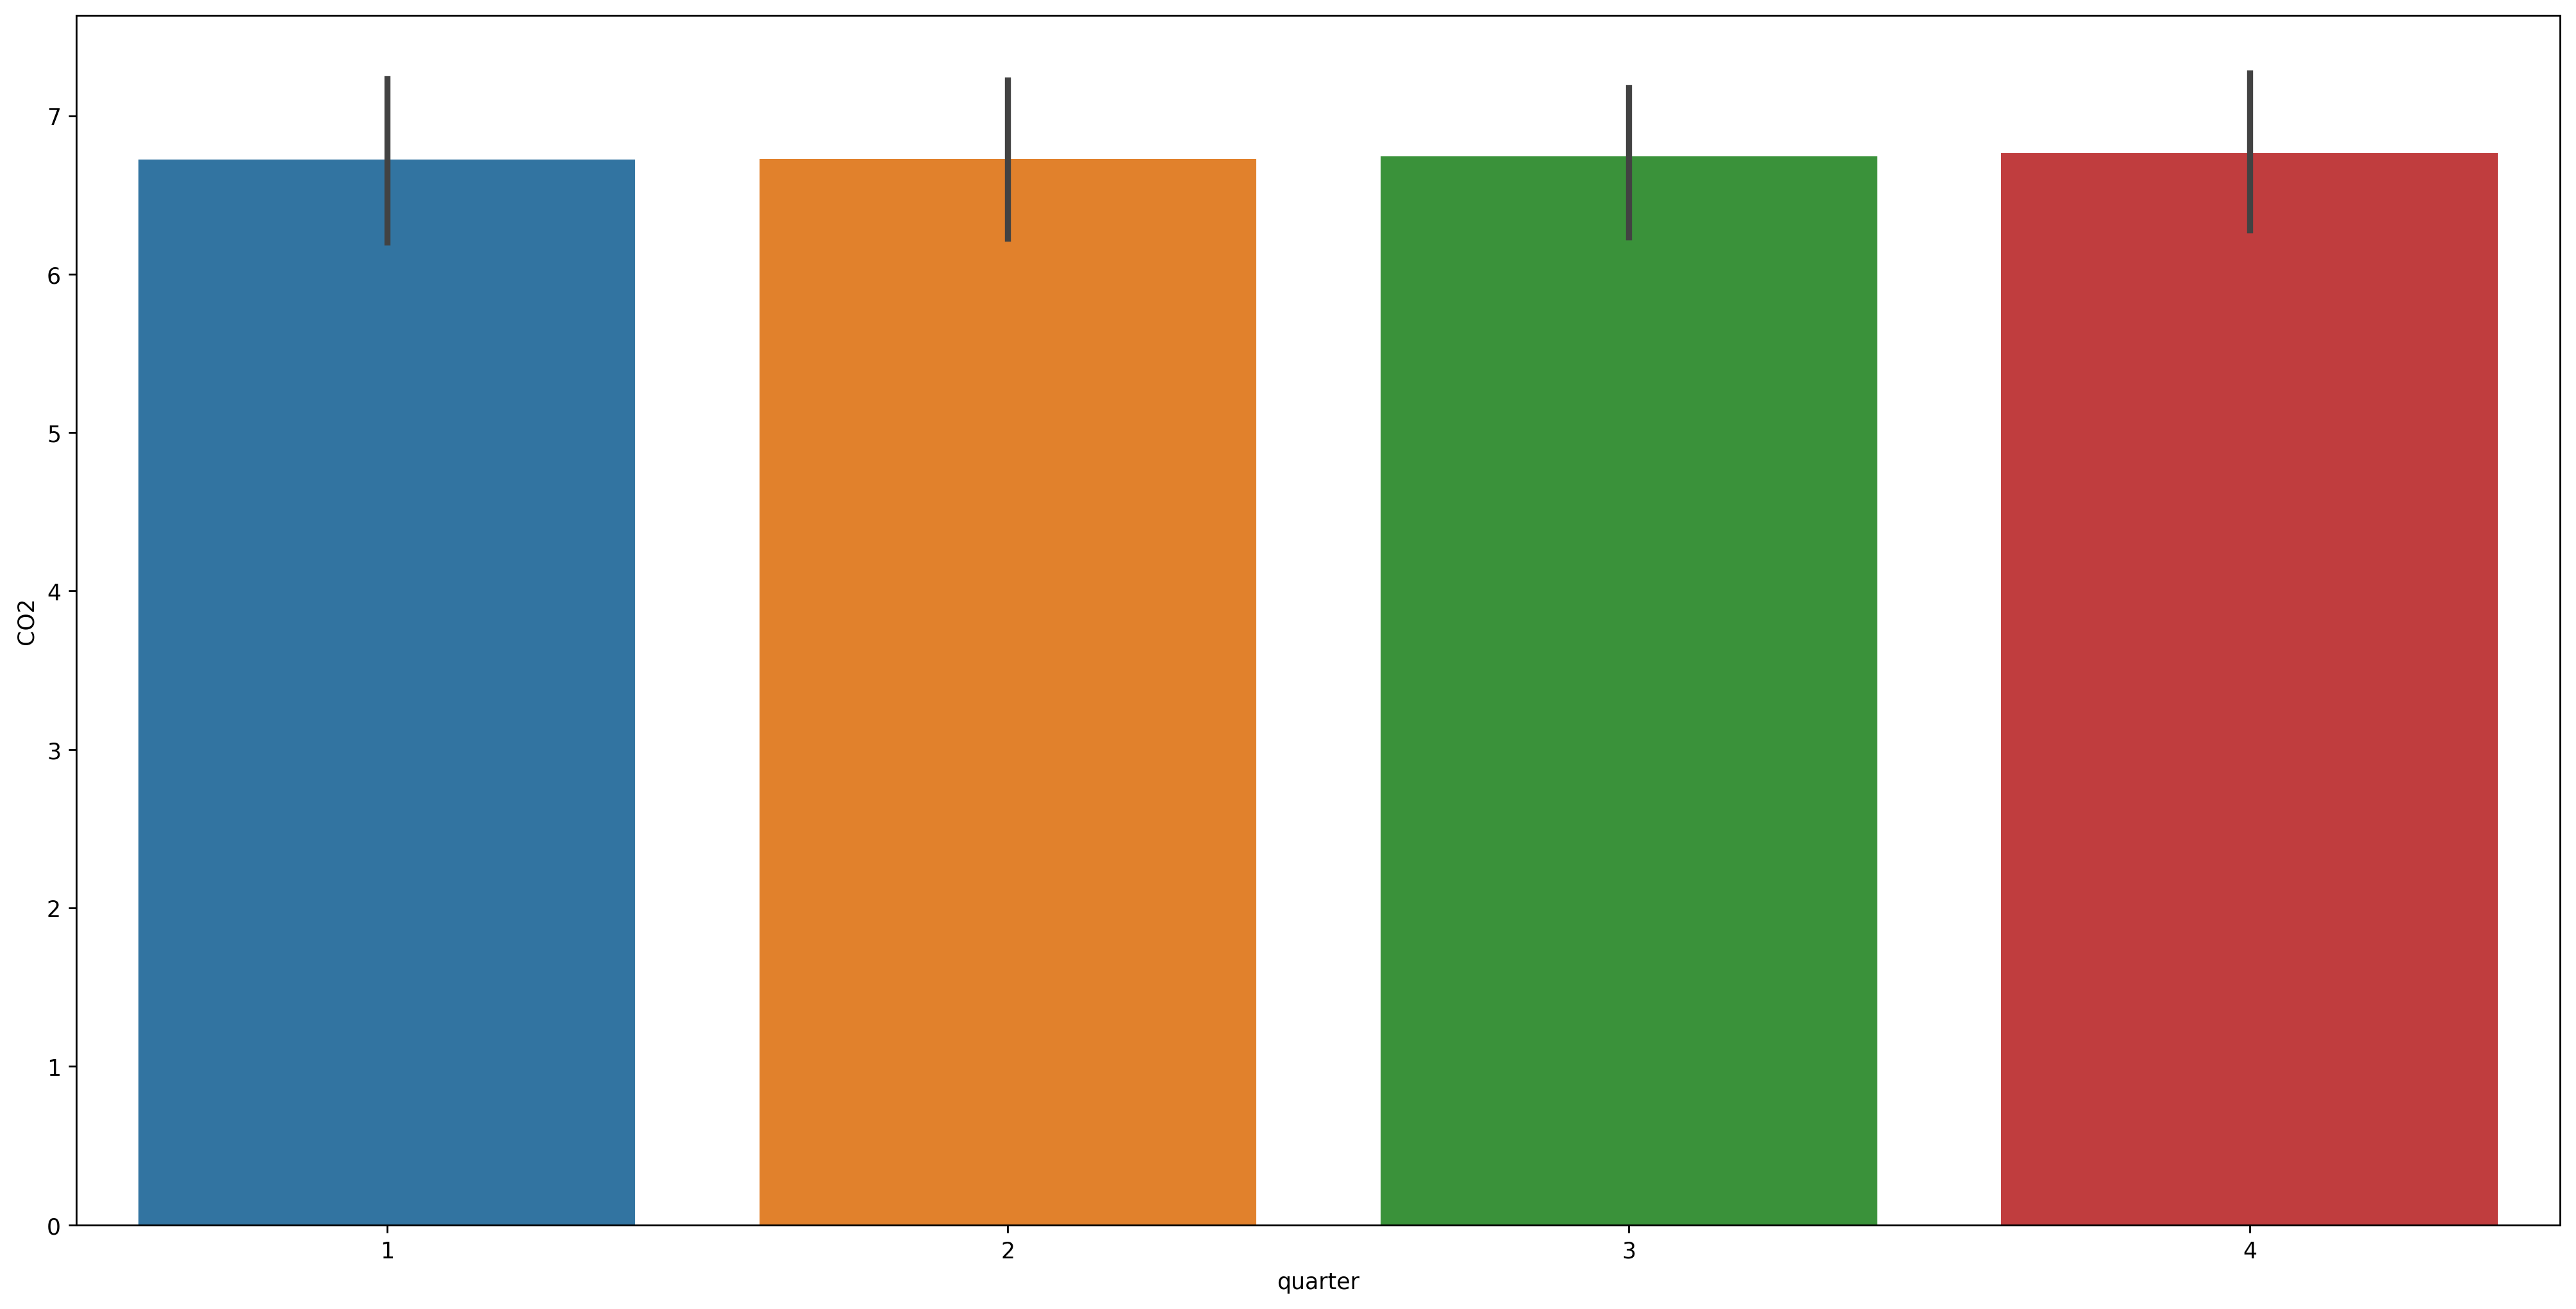

In [36]:
plt.figure(figsize=(20,10),dpi=250)
sns.barplot('quarter',"CO2",data=visual)

<AxesSubplot:xlabel='day_of_week', ylabel='CO2'>

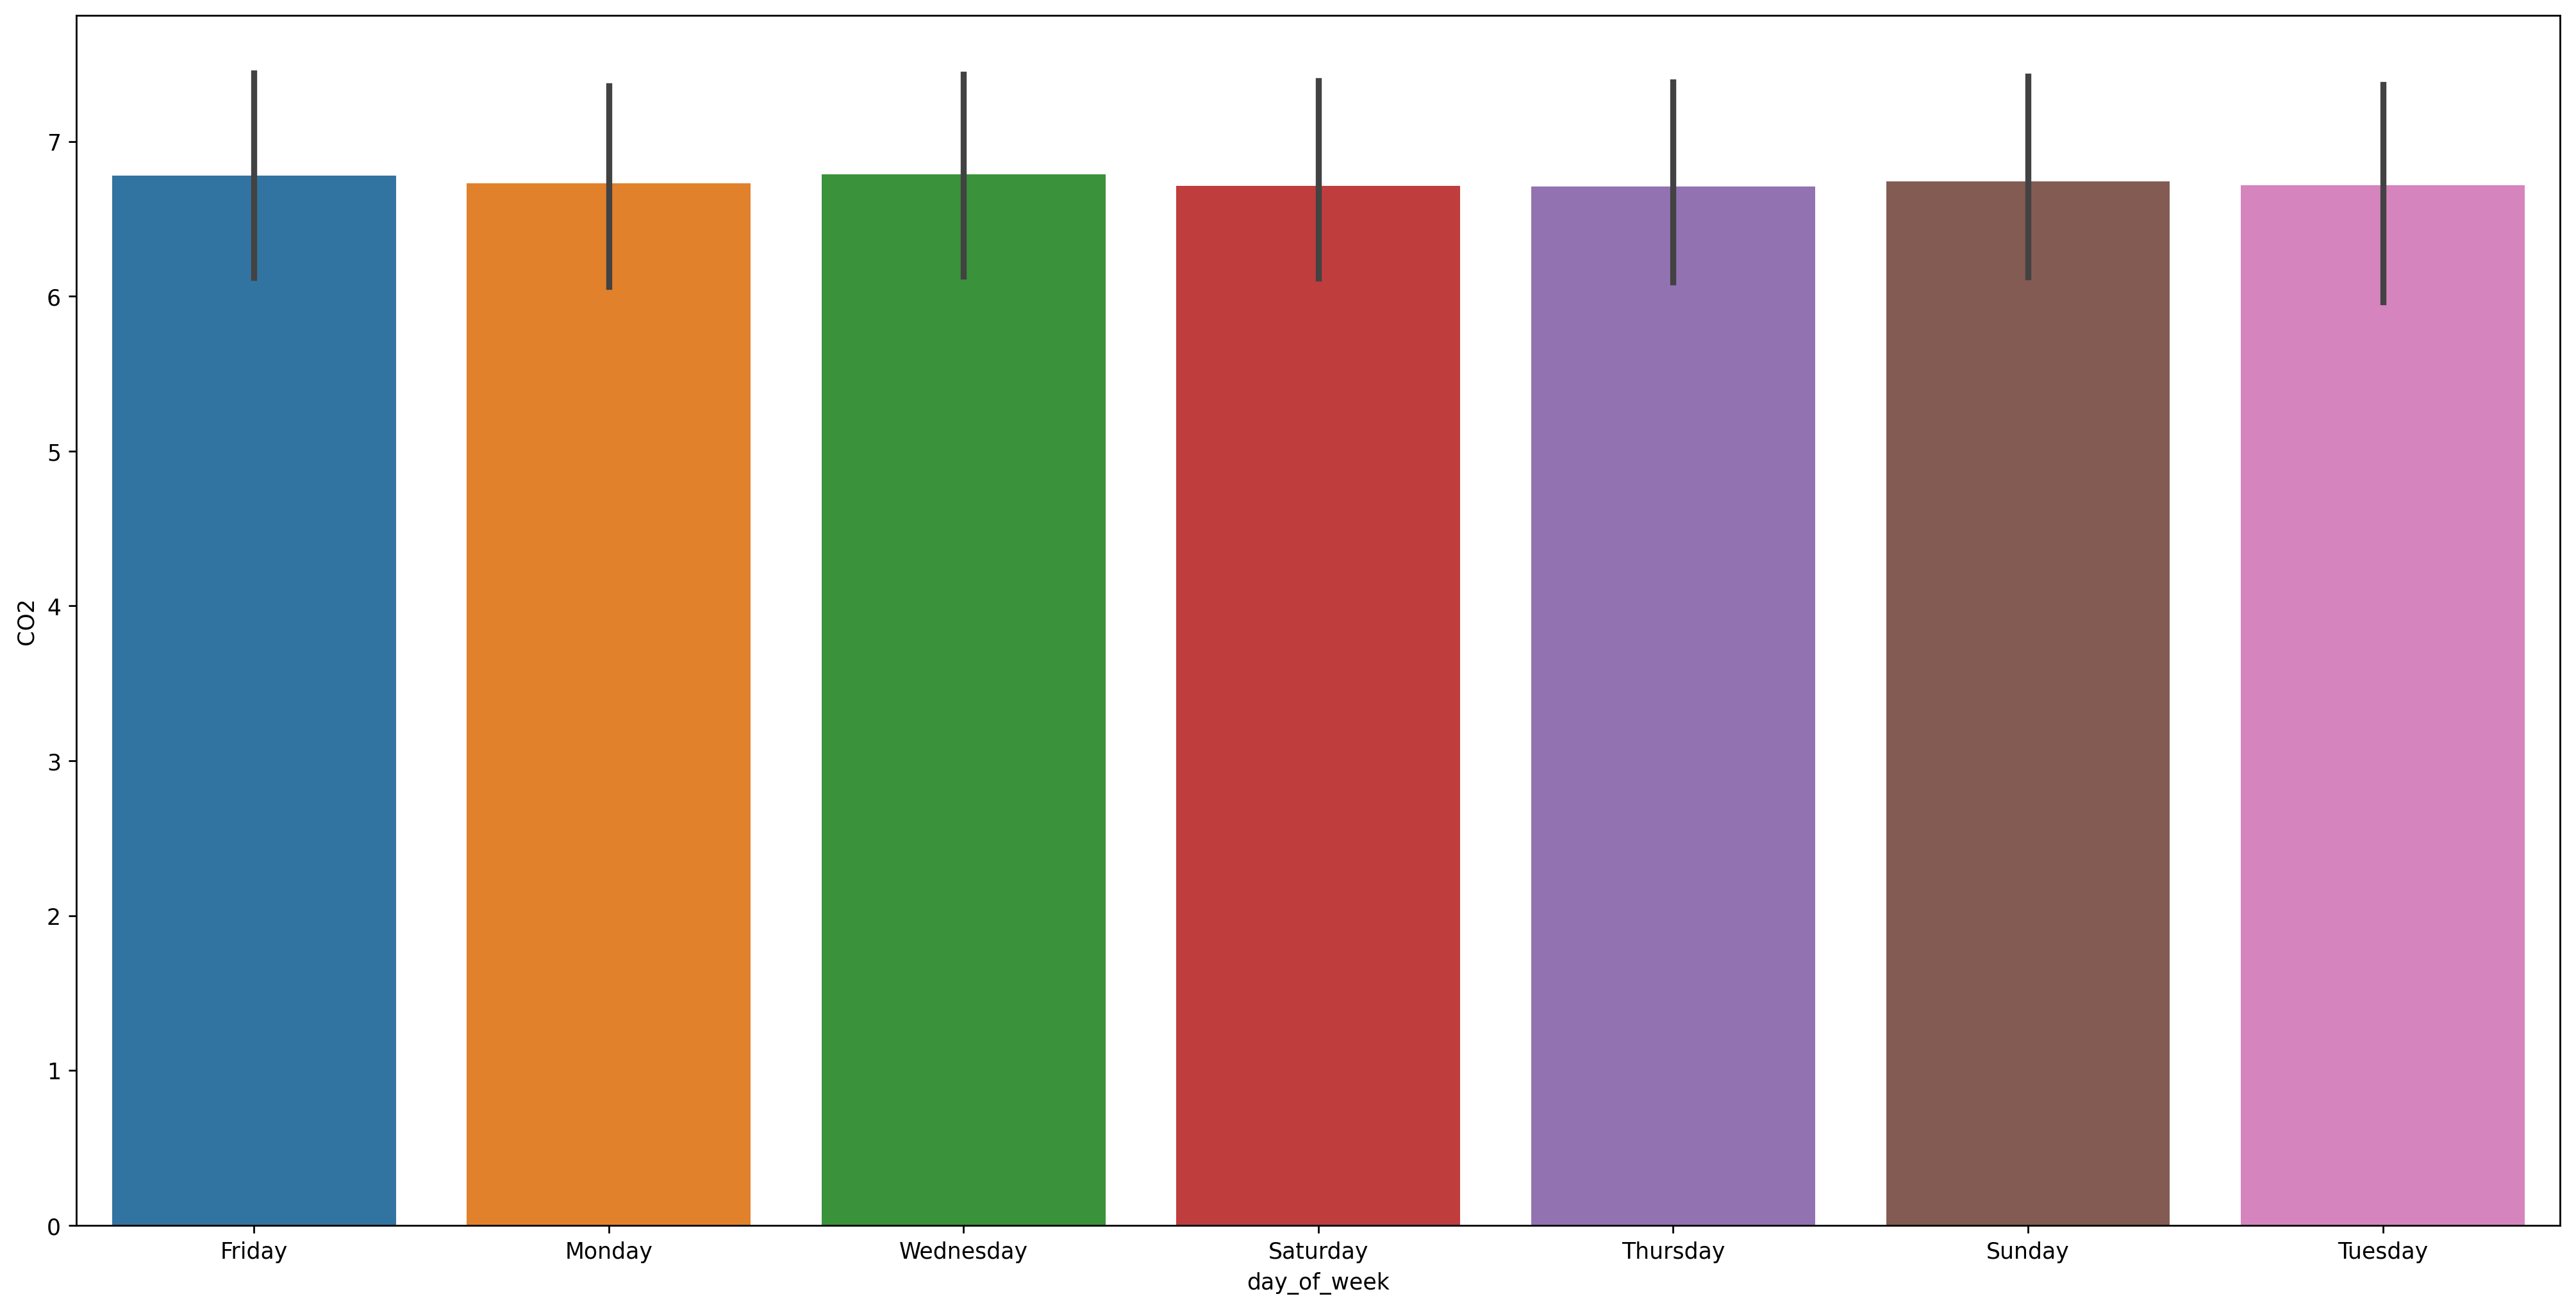

In [37]:
plt.figure(figsize=(20,10),dpi=250)
sns.barplot('day_of_week',"CO2",data=visual)

In [38]:
carbon_dioxide = time.copy()
carbon_dioxide.reset_index(inplace=True)
carbon_dioxide['t'] = np.arange(1,len(carbon_dioxide)+1)
carbon_dioxide['t_squared'] = np.square(carbon_dioxide.t)
carbon_dioxide["month"] = carbon_dioxide.Year.dt.strftime("%b") # month extraction
carbon_dioxide["year"] = carbon_dioxide.Year.dt.strftime("%Y") # year extraction
months = pd.get_dummies(carbon_dioxide['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
carbon_dioxide = pd.concat([carbon_dioxide,months],axis=1)
carbon_dioxide['log_CO2'] = np.log(carbon_dioxide['CO2'])
carbon_dioxide

,Year,CO2,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_CO2
0,1800-01-31,0.005680,1,1,Jan,1800,1,0,0,0,0,0,0,0,0,0,0,0,-5.170804
1,1800-02-28,0.005675,2,4,Feb,1800,0,1,0,0,0,0,0,0,0,0,0,0,-5.171750
2,1800-03-31,0.005669,3,9,Mar,1800,0,0,1,0,0,0,0,0,0,0,0,0,-5.172798
3,1800-04-30,0.005663,4,16,Apr,1800,0,0,0,1,0,0,0,0,0,0,0,0,-5.173814
4,1800-05-31,0.005657,5,25,May,1800,0,0,0,0,1,0,0,0,0,0,0,0,-5.174864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2013-09-30,14.965205,2565,6579225,Sep,2013,0,0,0,0,0,0,0,0,1,0,0,0,2.705728
2565,2013-10-31,14.999178,2566,6584356,Oct,2013,0,0,0,0,0,0,0,0,0,1,0,0,2.707995
2566,2013-11-30,15.032055,2567,6589489,Nov,2013,0,0,0,0,0,0,0,0,0,0,1,0,2.710185
2567,2013-12-31,15.066027,2568,6594624,Dec,2013,0,0,0,0,0,0,0,0,0,0,0,1,2.712442


<AxesSubplot:xlabel='Year'>

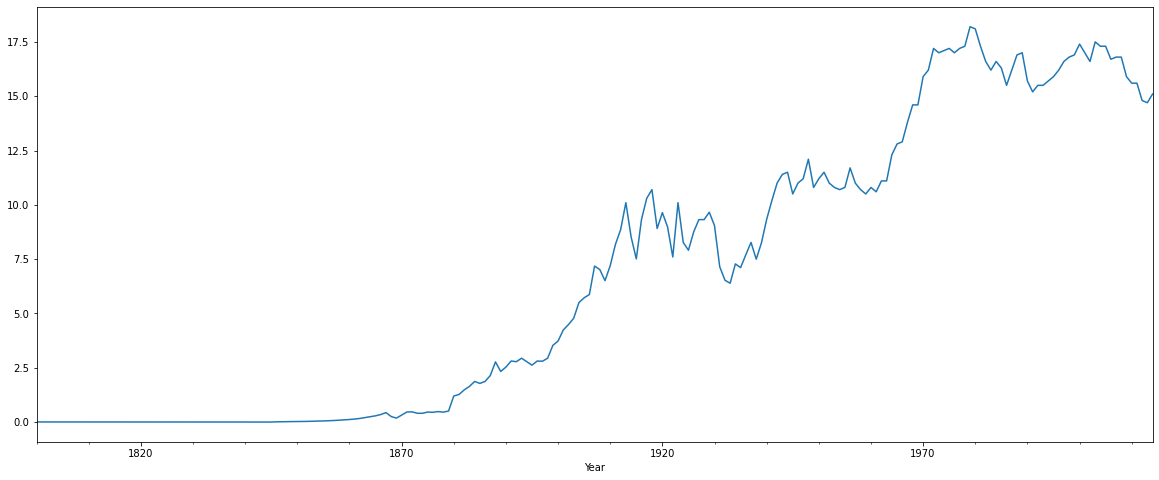

In [39]:
data['CO2'].plot(figsize=(20,8))

In [40]:
data = interpolated_month.copy()

# Time Series Decomposition

## Additive Seasonality Decomposition

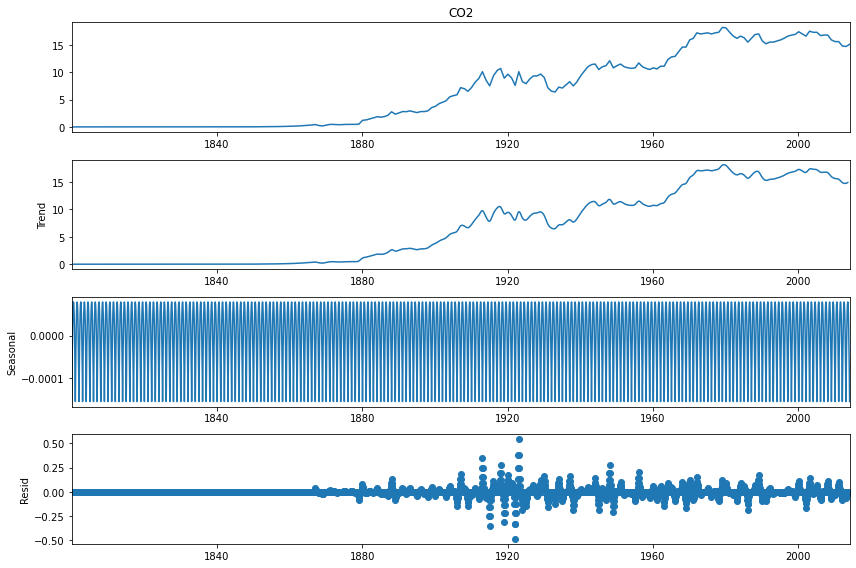

In [41]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['CO2'], model='additive')
fig = decomposition.plot()
plt.show()

# Multiplicative Seasonality Decoomposition

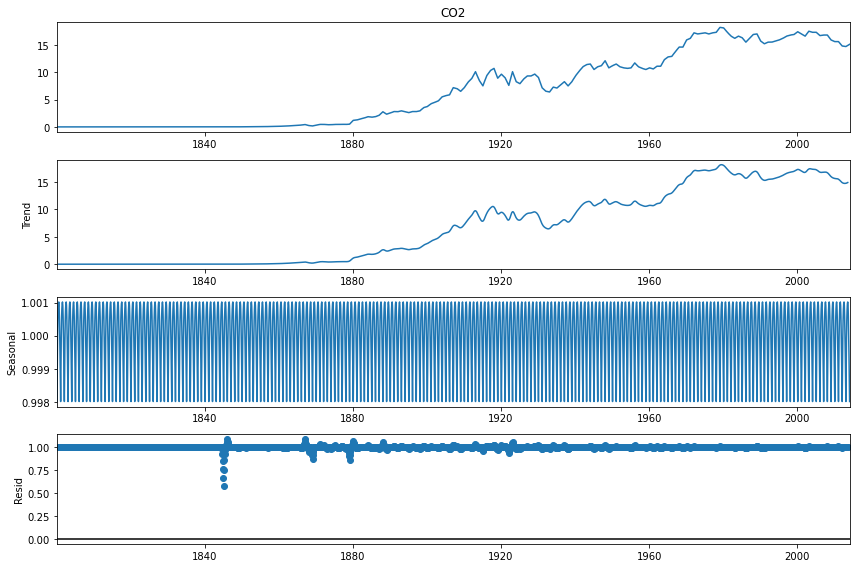

In [42]:
decomposition = sm.tsa.seasonal_decompose(data['CO2'], model='multiplicative')
fig = decomposition.plot()
plt.show()

# Conclusion 
As we can see in Additive Seaonality method and Multiplicative seasonality method we observed that no seasonality present in our data

# Spliting the data into train and Test

In [43]:
train_len = 2520
train = data[0:train_len]
test = data[train_len:]

In [44]:
train.head()

,CO2
Year,
1800-01-31,0.005680
1800-02-28,0.005674
1800-03-31,0.005668
1800-04-30,0.005662
1800-05-31,0.005657


In [45]:
train.shape

(2520, 1)

In [46]:
test.head()

,CO2
Year,
2010-01-31,15.6
2010-02-28,15.6
2010-03-31,15.6
2010-04-30,15.6
2010-05-31,15.6


In [47]:
test.shape

(49, 1)

# Simple Average Method

In [48]:
y_hat_avg = test.copy()

In [49]:
y_hat_avg['avg_forecast'] = train['CO2'].mean()

In [50]:
y_hat_avg.head()

,CO2,avg_forecast
Year,,
2010-01-31,15.6,6.575576
2010-02-28,15.6,6.575576
2010-03-31,15.6,6.575576
2010-04-30,15.6,6.575576
2010-05-31,15.6,6.575576


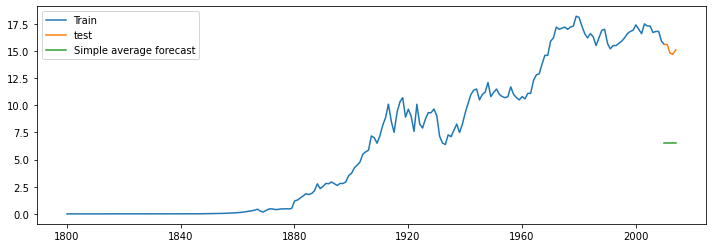

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [52]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_avg['avg_forecast'])).round(2)
rmse

8.55

In [53]:
results = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rmse]})
results

,Method,RMSE
0,Simple Average Method,8.55


# Simple Moving Average Method

In [54]:
y_hat_sma = data.copy()

In [55]:
ma_window = 12

In [56]:
y_hat_sma['sma_forecast'] = data['CO2'].rolling(ma_window).mean()

In [57]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

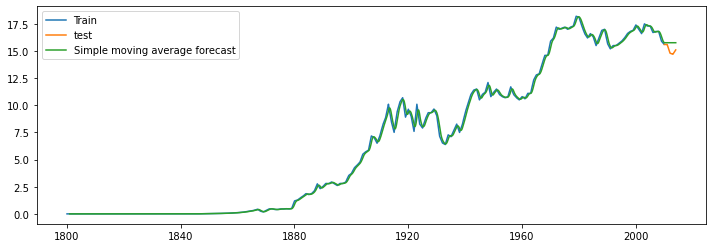

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [59]:
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

0.73

In [60]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73


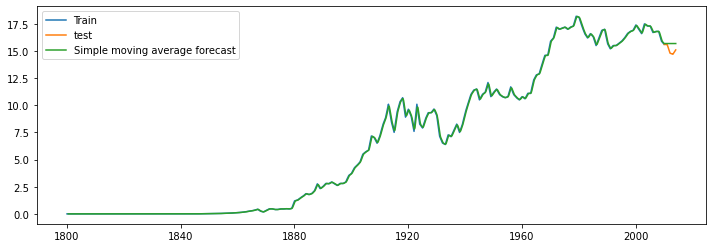

In [61]:
ma_window = 6
y_hat_sma['sma_forecast'] = data['CO2'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

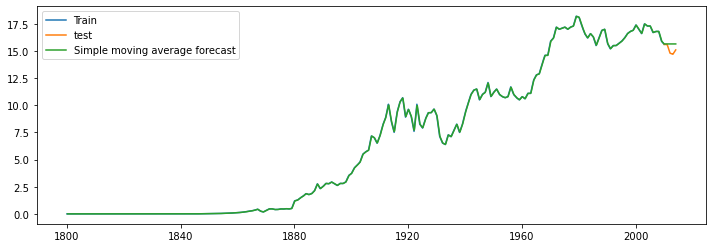

In [62]:
ma_window = 3
y_hat_sma['sma_forecast'] = data['CO2'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

# Simple Exponential Smoothning

In [63]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [64]:
# Instantiate the model
model = SimpleExpSmoothing(train['CO2'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.00568,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(49)

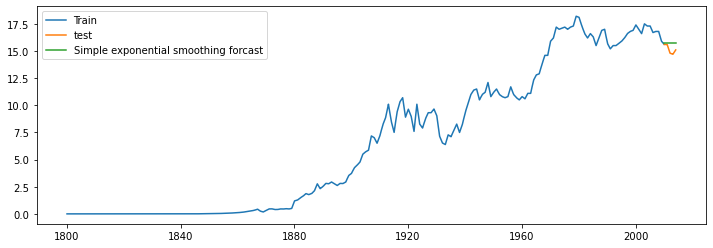

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [67]:
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_ses['ses_forecast'])).round(2)
rmse

0.71

In [68]:
results = results.append({'Method':'Simple exponential smoothing method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71


# Holt's Exponential Smoothing

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
model = ExponentialSmoothing(np.asarray(train['CO2']), seasonal_periods = 12, trend='additive', seasonal=None)

In [71]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 0.005679978216819982,
 'initial_trend': -2.49477437471436e-06,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(49)

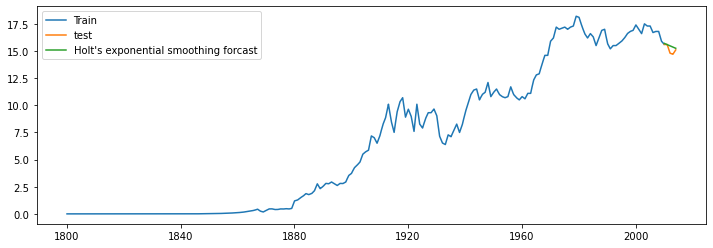

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [74]:
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_holt['holt_forecast'])).round(2)
rmse

0.44

In [75]:
results = results.append({'Method':'Holt\'s exponential smoothing method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71
3,Holt's exponential smoothing method,0.44


# Holt's-Winter Exponential Method

## Additive Method

In [76]:
y_hat_hwa = test.copy()

In [77]:
model = ExponentialSmoothing(np.asarray(data['CO2']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [78]:
model_fit = model.fit(optimized=True)

In [79]:
model_fit.params

{'smoothing_level': 0.9950081575354969,
 'smoothing_trend': 0.9950081575354969,
 'smoothing_seasonal': 9.979115948810951e-05,
 'damping_trend': nan,
 'initial_level': 6.741970828026328,
 'initial_trend': -5.233796033287808e-06,
 'initial_seasons': array([-6.73638077, -6.73630912, -6.73627556, -6.73628054, -6.7363221 ,
        -6.73632055, -6.73632409, -6.73632967, -6.73635334, -6.73632803,
        -6.73631304, -6.73633022]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(49)

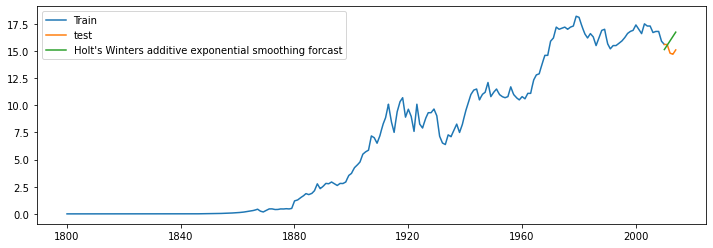

In [81]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [82]:
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

1.13

In [83]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71
3,Holt's exponential smoothing method,0.44
4,Holt's Winter additive method,1.13


## Multiplicative Method

In [84]:
y_hat_hwm = test.copy()

In [85]:
model = ExponentialSmoothing(np.asarray(train['CO2']), seasonal_periods = 12, trend='add', seasonal='mul')

In [86]:
model_fit = model.fit(optimized=True)

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [87]:
model_fit.params

{'smoothing_level': 0.9364592199958005,
 'smoothing_trend': 0.475006971869343,
 'smoothing_seasonal': 0.0589246958163776,
 'damping_trend': nan,
 'initial_level': 2.061030706087549,
 'initial_trend': -2.0796424084352387,
 'initial_seasons': array([1.27901408, 1.07814804, 0.72431322, 1.9941445 , 0.7910982 ,
        0.94209079, 1.86609155, 0.39597657, 2.19815282, 1.11446595,
        1.43646706, 1.27874806]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
y_hat_hwm['hwm_forecast'] = model_fit.forecast(49)

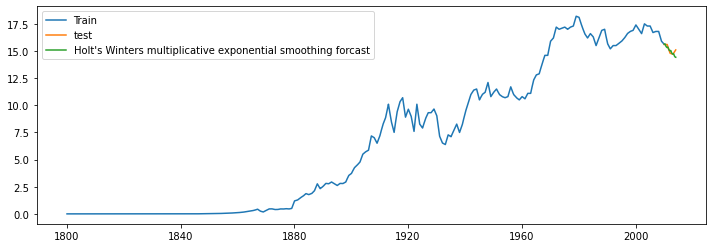

In [89]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE

In [90]:
rmse = np.sqrt(mean_squared_error(test['CO2'], y_hat_hwm['hwm_forecast'])).round(2)
rmse

0.24

In [91]:
results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71
3,Holt's exponential smoothing method,0.44
4,Holt's Winter additive method,1.13
5,Holt's Winter multiplicative method,0.24


# AR Models

## 1.Visually checking the Stationarity

<AxesSubplot:xlabel='Year'>

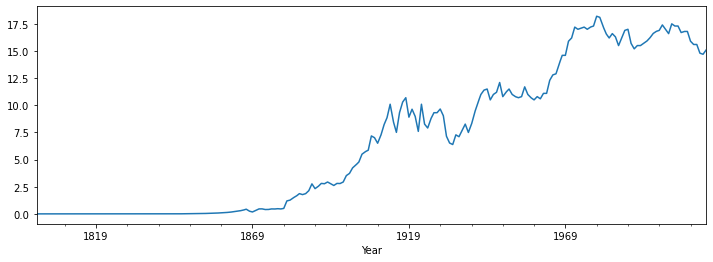

In [92]:
data["CO2"].plot(figsize=(12,4))

## 2. Augmented Dicky-Fuller(ADF)Test

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [95]:
adf_test(data['CO2'])

ADF Statistics: -0.5077794830962886
p- value: 0.8904894209652675
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Conclusion: 
Hence the p-value is more than 0.05 it means that the data is not stationary

# Converting Non-Stationary Data into Stationary Time Series Data

In [96]:
data['CO2 First Difference']=data['CO2']-data['CO2'].shift(1)

In [97]:
adf_test(data['CO2 First Difference'].dropna())

ADF Statistics: -7.322026294271238
p- value: 1.1872912736592636e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## Conclusion:
Hence the p-value is less than 0.05 it means that the data is now stationary

# For value of AR:

In [98]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

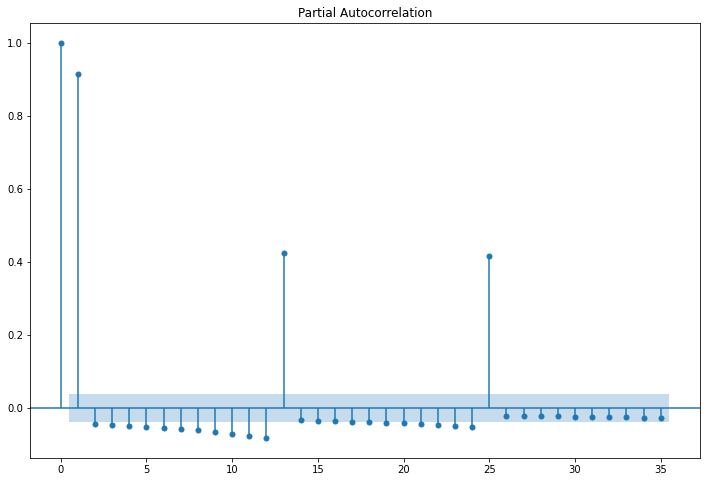

In [99]:
pacf = plot_pacf(data["CO2 First Difference"].dropna())


# For value of MA(q value)

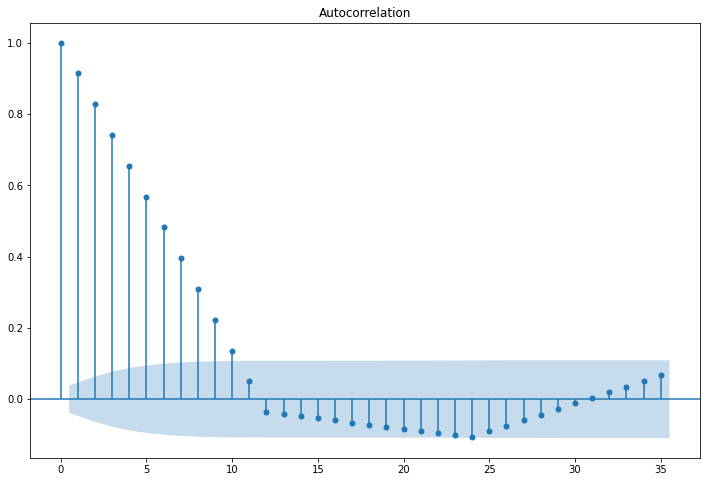

In [100]:
acf = plot_acf(data["CO2 First Difference"].dropna())


# ARIMA Model

In [101]:
from statsmodels.tsa.arima.model import ARIMA

In [102]:
import itertools
p = range(0,8)
q = range(0,8)
d = range(0,3)

In [103]:
pqd_combination = list(itertools.product(p,d,q))

In [104]:
len(pqd_combination)

192

In [105]:
rmse = []
order = []

In [106]:
for pdq in pqd_combination:
    try:
        model = ARIMA(train, order=pdq).fit()
        pred = model.predict(start=len(train),end=(len(data)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: C

In [107]:
value_pqd = pd.DataFrame(index=order,data=rmse,columns=['rmse'])
value_pqd.sort_values('rmse')

,rmse
"(5, 1, 6)",0.195375
"(5, 0, 4)",0.203329
"(6, 0, 5)",0.205734
"(7, 0, 6)",0.206325
"(2, 2, 2)",0.207753
...,...
"(0, 0, 4)",8.303536
"(0, 0, 3)",8.352531
"(0, 0, 2)",8.406980
"(0, 0, 1)",8.475382


In [106]:
model = ARIMA(train, order=(5, 1, 6))
model_fit = model.fit()
y_hat_ar = data.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data.index.min(), data.index.max())

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


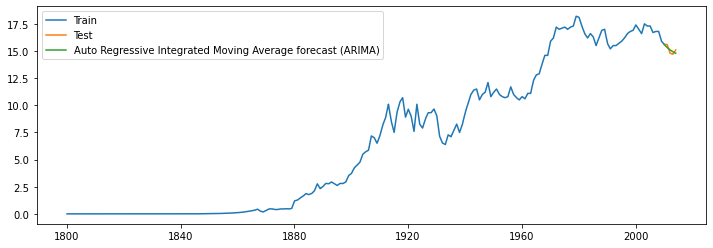

In [107]:
plt.figure(figsize=(12,4))
plt.plot(train['CO2'], label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test.index.min():], label='Auto Regressive Integrated Moving Average forecast (ARIMA)')
plt.legend(loc='best')
plt.show()

In [108]:
rmse = np.sqrt(mean_squared_error(test, y_hat_ar['arima_forecast'][test.index.min():])).round(2)
rmse

0.2

In [109]:
results = results.append({'Method':'Auto Regressive Integrated Moving Average','RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71
3,Holt's exponential smoothing method,0.44
4,Holt's Winter additive method,1.13
5,Holt's Winter multiplicative method,0.24
6,Auto Regressive Integrated Moving Average,0.20


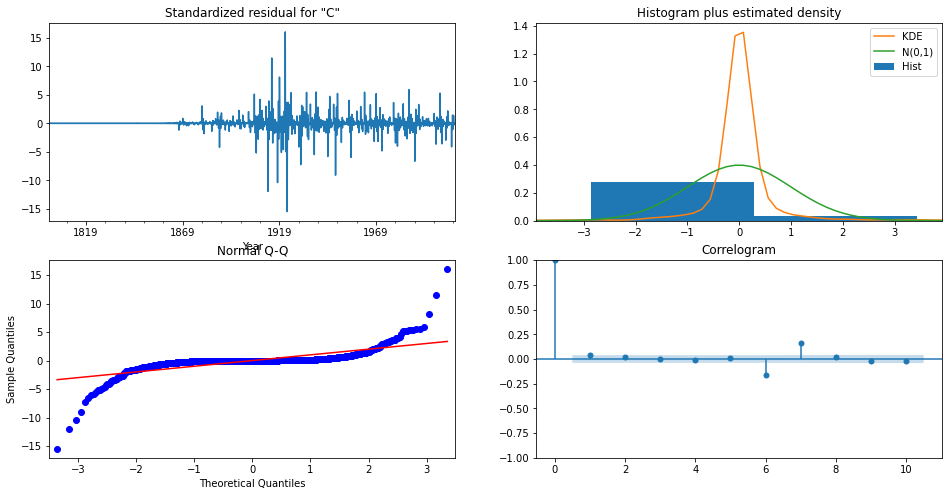

In [110]:
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

# SARIMA Model

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
model = SARIMAX(train, order=(5,1,6), seasonal_order=(0,1,0,12))
model_fit= model.fit()
y_hat_sarima = data.copy()

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
y_hat_sarima['sarima_forecast'] = model_fit.predict(data.index.min(), data.index.max())

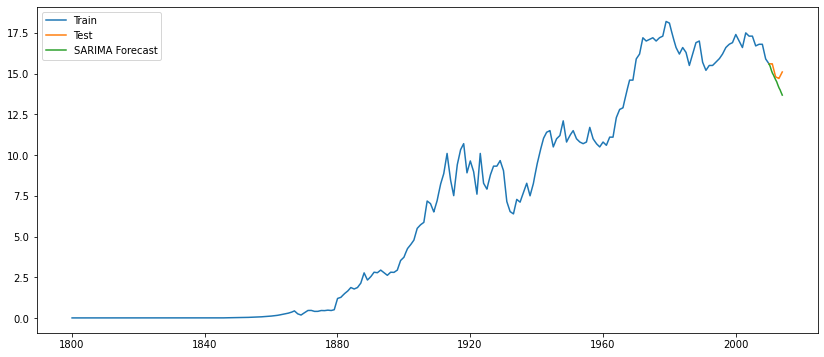

In [114]:
plt.figure(figsize=(14,6))
plt.plot(train['CO2'], label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [115]:
rmse = np.sqrt(mean_squared_error(test, y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse

0.6

In [116]:
results = results.append({'Method':'Seasonal Auto Regressive Integrated Moving Average','RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple Average Method,8.55
1,Simple moving average method,0.73
2,Simple exponential smoothing method,0.71
3,Holt's exponential smoothing method,0.44
4,Holt's Winter additive method,1.13
5,Holt's Winter multiplicative method,0.24
6,Auto Regressive Integrated Moving Average,0.20
7,Seasonal Auto Regressive Integrated Moving Ave...,0.60


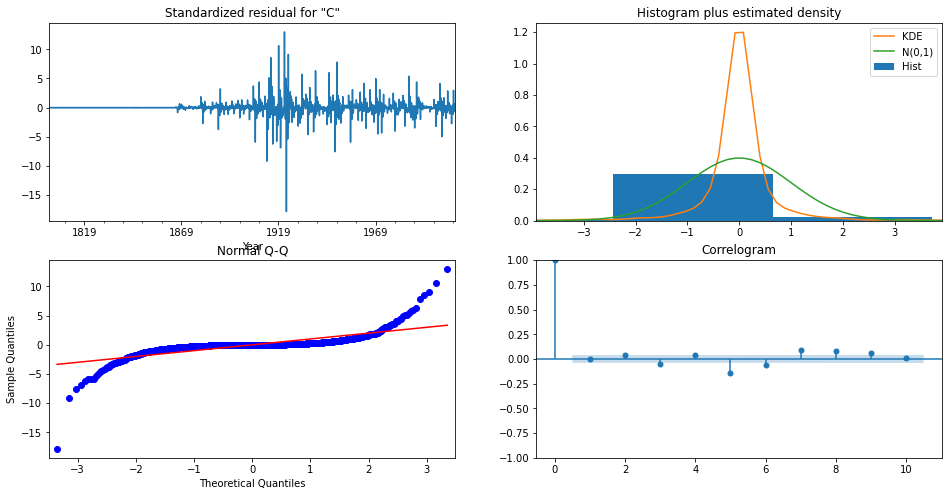

In [117]:
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

In [118]:
results.sort_values(['RMSE'], inplace=True, ignore_index=True)
results

,Method,RMSE
0,Auto Regressive Integrated Moving Average,0.20
1,Holt's Winter multiplicative method,0.24
2,Holt's exponential smoothing method,0.44
3,Seasonal Auto Regressive Integrated Moving Ave...,0.60
4,Simple exponential smoothing method,0.71
5,Simple moving average method,0.73
6,Holt's Winter additive method,1.13
7,Simple Average Method,8.55


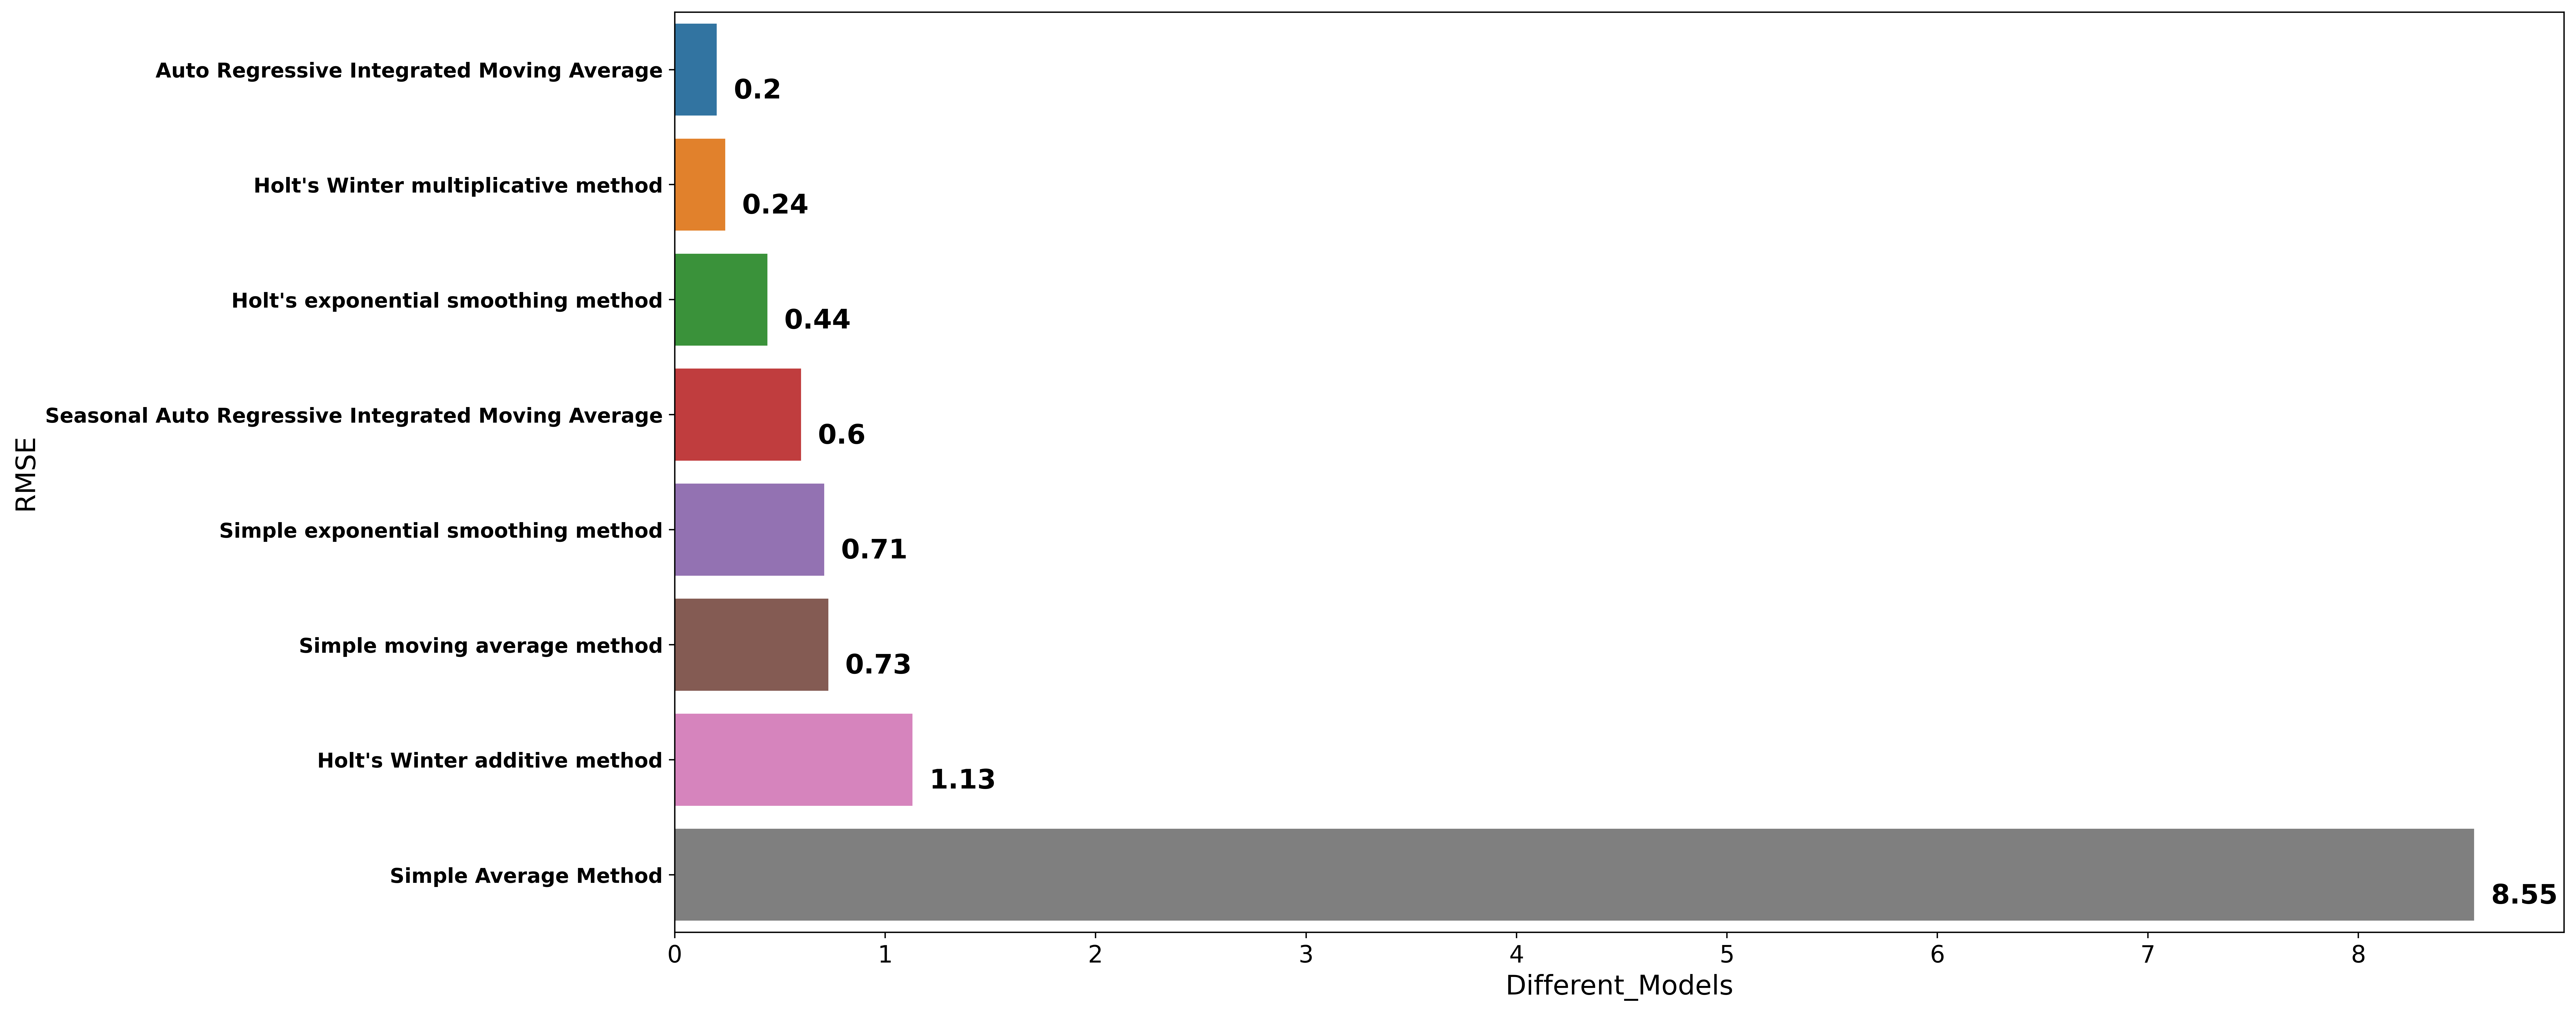

In [119]:
f, axe = plt.subplots(1,1, figsize=(20,10), dpi=500)
sns.barplot(x='RMSE', y='Method', data=results, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(results.RMSE.values,2)):
    axe.text(v + 0.08, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [120]:
carbon_dioxide.head()

,Year,CO2,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_CO2
0,1800-01-31,0.005680,1,1,Jan,1800,1,0,0,0,0,0,0,0,0,0,0,0,-5.170804
1,1800-02-28,0.005675,2,4,Feb,1800,0,1,0,0,0,0,0,0,0,0,0,0,-5.171750
2,1800-03-31,0.005669,3,9,Mar,1800,0,0,1,0,0,0,0,0,0,0,0,0,-5.172798
3,1800-04-30,0.005663,4,16,Apr,1800,0,0,0,1,0,0,0,0,0,0,0,0,-5.173814
4,1800-05-31,0.005657,5,25,May,1800,0,0,0,0,1,0,0,0,0,0,0,0,-5.174864


In [121]:
train_data = carbon_dioxide.iloc[:train_len]
test_data = carbon_dioxide.iloc[train_len:]

In [122]:
train_data

,Year,CO2,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_CO2
0,1800-01-31,0.005680,1,1,Jan,1800,1,0,0,0,0,0,0,0,0,0,0,0,-5.170804
1,1800-02-28,0.005675,2,4,Feb,1800,0,1,0,0,0,0,0,0,0,0,0,0,-5.171750
2,1800-03-31,0.005669,3,9,Mar,1800,0,0,1,0,0,0,0,0,0,0,0,0,-5.172798
3,1800-04-30,0.005663,4,16,Apr,1800,0,0,0,1,0,0,0,0,0,0,0,0,-5.173814
4,1800-05-31,0.005657,5,25,May,1800,0,0,0,0,1,0,0,0,0,0,0,0,-5.174864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2009-08-31,15.725753,2516,6330256,Aug,2009,0,0,0,0,0,0,0,1,0,0,0,0,2.755300
2516,2009-09-30,15.701096,2517,6335289,Sep,2009,0,0,0,0,0,0,0,0,1,0,0,0,2.753731
2517,2009-10-31,15.675616,2518,6340324,Oct,2009,0,0,0,0,0,0,0,0,0,1,0,0,2.752106
2518,2009-11-30,15.650959,2519,6345361,Nov,2009,0,0,0,0,0,0,0,0,0,0,1,0,2.750532


In [123]:
test_data

,Year,CO2,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_CO2
2520,2010-01-31,15.600000,2521,6355441,Jan,2010,1,0,0,0,0,0,0,0,0,0,0,0,2.747271
2521,2010-02-28,15.600000,2522,6360484,Feb,2010,0,1,0,0,0,0,0,0,0,0,0,0,2.747271
2522,2010-03-31,15.600000,2523,6365529,Mar,2010,0,0,1,0,0,0,0,0,0,0,0,0,2.747271
2523,2010-04-30,15.600000,2524,6370576,Apr,2010,0,0,0,1,0,0,0,0,0,0,0,0,2.747271
2524,2010-05-31,15.600000,2525,6375625,May,2010,0,0,0,0,1,0,0,0,0,0,0,0,2.747271
2525,2010-06-30,15.600000,2526,6380676,Jun,2010,0,0,0,0,0,1,0,0,0,0,0,0,2.747271
2526,2010-07-31,15.600000,2527,6385729,Jul,2010,0,0,0,0,0,0,1,0,0,0,0,0,2.747271
2527,2010-08-31,15.600000,2528,6390784,Aug,2010,0,0,0,0,0,0,0,1,0,0,0,0,2.747271
2528,2010-09-30,15.600000,2529,6395841,Sep,2010,0,0,0,0,0,0,0,0,1,0,0,0,2.747271
2529,2010-10-31,15.600000,2530,6400900,Oct,2010,0,0,0,0,0,0,0,0,0,1,0,0,2.747271


In [124]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('CO2~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(pred_linear))**2))
rmse_linear

2.3469371365460128

In [125]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.418e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:05:25   Log-Likelihood:                -5299.8
No. Observations:                2520   AIC:                         1.060e+04
Df Residuals:                    2518   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0675      0.079    -51.472      0.000      -4.222      -3.913
t              0.0084   5.43e-05    155.500      0.000       0.008       0.009
==============================================================================
Omnibus:                      361.729   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.441
Skew:                           0.185   Prob(JB):                     1.55e-22
Kurtosis:                       2.095   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
Exp = smf.ols('log_CO2~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

156.35984471217887

In [127]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_CO2   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 1.246e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:05:26   Log-Likelihood:                -4352.6
No. Observations:                2520   AIC:                             8709.
Df Residuals:                    2518   BIC:                             8721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4499      0.054   -100.430      0.000      -5.556      -5.343
t              0.0042   3.73e-05    111.604      0.000       0.004       0.004
==============================================================================
Omnibus:                      375.297   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.534
Skew:                          -0.222   Prob(JB):                     4.46e-24
Kurtosis:                       2.091   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
Quad = smf.ols('CO2~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(pred_Quad))**2))
rmse_Quad

5.324067931745952

In [129]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -4641.9
No. Observations:                2520   AIC:                             9290.
Df Residuals:                    2517   BIC:                             9307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2375      0.091    -13.545      0.000      -1.417      -1.058
t              0.0017      0.000     10.219      0.000       0.001       0.002
t_squared   2.671e-06   6.43e-08     41.542      0.000    2.54e-06     2.8e-06
==============================================================================
Omnibus:                       73.688   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.137
Skew:                           0.398   Prob(JB):                     4.83e-17
Kurtosis:                       2.712   Cond. No.                     8.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
add_sea = smf.ols('CO2~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(pred_add_sea))**2))
rmse_add_sea

8.55048693503725

In [131]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002511
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               1.00
Time:                        18:05:29   Log-Likelihood:                -8274.8
No. Observations:                2520   AIC:                         1.657e+04
Df Residuals:                    2508   BIC:                         1.664e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0695      0.119     51.021      0.000       5.836       6.303
Jan            0.4721      0.428      1.104      0.270      -0.366       1.310
Feb            0.4777      0.428      1.117      0.264      -0.361       1.316
Mar            0.4840      0.428      1.132      0.258      -0.354       1.322
Apr            0.4901      0.428      1.146      0.252      -0.348       1.329
May            0.4964      0.428      1.161      0.246      -0.342       1.335
Jun            0.5025      0.428      1.175      0.240      -0.336       1.341
Jul            0.5089      0.428      1.190      0.234      -0.330       1.347
Aug            0.5152      0.428      1.205      0.228      -0.323       1.354
Sep            0.5213      0.428      1.219      0.223      -0.317       1.360
Oct            0.5276      0.428      1.234      0.217      -0.311       1.366
Nov            0.5337      0.428      1.248      0.212      -0.305       1.372
Dec            0.5400      0.428      1.263      0.207      -0.298       1.378
==============================================================================
Omnibus:                   100298.130   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.708
Skew:                           0.408   Prob(JB):                     1.48e-57
Kurtosis:                       1.649   Cond. No.                     1.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
add_sea_Quad = smf.ols('CO2~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

5.324287402601258

In [133]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3253.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:05:31   Log-Likelihood:                -4641.8
No. Observations:                2520   AIC:                             9312.
Df Residuals:                    2506   BIC:                             9393.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1424      0.085    -13.516      0.000      -1.308      -0.977
t              0.0017      0.000     10.197      0.000       0.001       0.002
t_squared   2.671e-06   6.44e-08     41.452      0.000    2.54e-06     2.8e-06
Jan           -0.0825      0.101     -0.814      0.416      -0.281       0.116
Feb           -0.0853      0.101     -0.841      0.400      -0.284       0.114
Mar           -0.0874      0.101     -0.862      0.389      -0.286       0.111
Apr           -0.0897      0.101     -0.885      0.376      -0.289       0.109
May           -0.0919      0.101     -0.906      0.365      -0.291       0.107
Jun           -0.0942      0.101     -0.929      0.353      -0.293       0.105
Jul           -0.0963      0.101     -0.950      0.342      -0.295       0.102
Aug           -0.0985      0.101     -0.971      0.332      -0.297       0.100
Sep           -0.1008      0.101     -0.994      0.320      -0.300       0.098
Oct           -0.1030      0.101     -1.015      0.310      -0.302       0.096
Nov           -0.1053      0.101     -1.039      0.299      -0.304       0.094
Dec           -0.1075      0.101     -1.060      0.289      -0.306       0.091
==============================================================================
Omnibus:                       73.770   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.203
Skew:                           0.398   Prob(JB):                     4.68e-17
Kurtosis:                       2.712   Cond. No.                     2.27e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [134]:
Mul_sea = smf.ols('log_CO2~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

14.307322220661993

In [135]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_CO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002521
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               1.00
Time:                        18:05:32   Log-Likelihood:                -6599.0
No. Observations:                2520   AIC:                         1.322e+04
Df Residuals:                    2508   BIC:                         1.329e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1888      0.061     -3.086      0.002      -0.309      -0.069
Jan           -0.0355      0.220     -0.161      0.872      -0.467       0.396
Feb           -0.0310      0.220     -0.141      0.888      -0.462       0.400
Mar           -0.0266      0.220     -0.121      0.904      -0.458       0.405
Apr           -0.0229      0.220     -0.104      0.917      -0.454       0.408
May           -0.0193      0.220     -0.088      0.930      -0.450       0.412
Jun           -0.0161      0.220     -0.073      0.942      -0.447       0.415
Jul           -0.0130      0.220     -0.059      0.953      -0.444       0.418
Aug           -0.0100      0.220     -0.046      0.964      -0.441       0.421
Sep           -0.0074      0.220     -0.033      0.973      -0.439       0.424
Oct           -0.0048      0.220     -0.022      0.983      -0.436       0.426
Nov           -0.0024      0.220     -0.011      0.991      -0.434       0.429
Dec        -1.295e-05      0.220  -5.89e-05      1.000      -0.431       0.431
==============================================================================
Omnibus:                     1245.117   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.824
Skew:                          -0.749   Prob(JB):                     6.02e-80
Kurtosis:                       1.891   Cond. No.                     1.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
Mul_Add_sea = smf.ols('log_CO2~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['CO2'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

156.3631321442153

In [137]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_CO2   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1033.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -4352.6
No. Observations:                2520   AIC:                             8731.
Df Residuals:                    2507   BIC:                             8807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0307      0.050   -100.211      0.000      -5.129      -4.932
t              0.0042   3.74e-05    111.360      0.000       0.004       0.004
Jan           -0.4161      0.090     -4.611      0.000      -0.593      -0.239
Feb           -0.4157      0.090     -4.607      0.000      -0.593      -0.239
Mar           -0.4156      0.090     -4.604      0.000      -0.593      -0.239
Apr           -0.4159      0.090     -4.609      0.000      -0.593      -0.239
May           -0.4165      0.090     -4.615      0.000      -0.594      -0.240
Jun           -0.4175      0.090     -4.626      0.000      -0.594      -0.240
Jul           -0.4185      0.090     -4.637      0.000      -0.596      -0.242
Aug           -0.4198      0.090     -4.651      0.000      -0.597      -0.243
Sep           -0.4213      0.090     -4.667      0.000      -0.598      -0.244
Oct           -0.4228      0.090     -4.684      0.000      -0.600      -0.246
Nov           -0.4246      0.090     -4.704      0.000      -0.602      -0.248
Dec           -0.4264      0.090     -4.724      0.000      -0.603      -0.249
==============================================================================
Omnibus:                      375.368   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.535
Skew:                          -0.222   Prob(JB):                     4.46e-24
Kurtosis:                       2.091   Cond. No.                     1.12e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [138]:
data = {"Method":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
rmse=pd.DataFrame(data)
rmse.sort_values(['RMSE'], inplace=True, ignore_index=True)

In [139]:
e=rmse.append(results)
e.sort_values(['RMSE'], inplace=True, ignore_index=True)

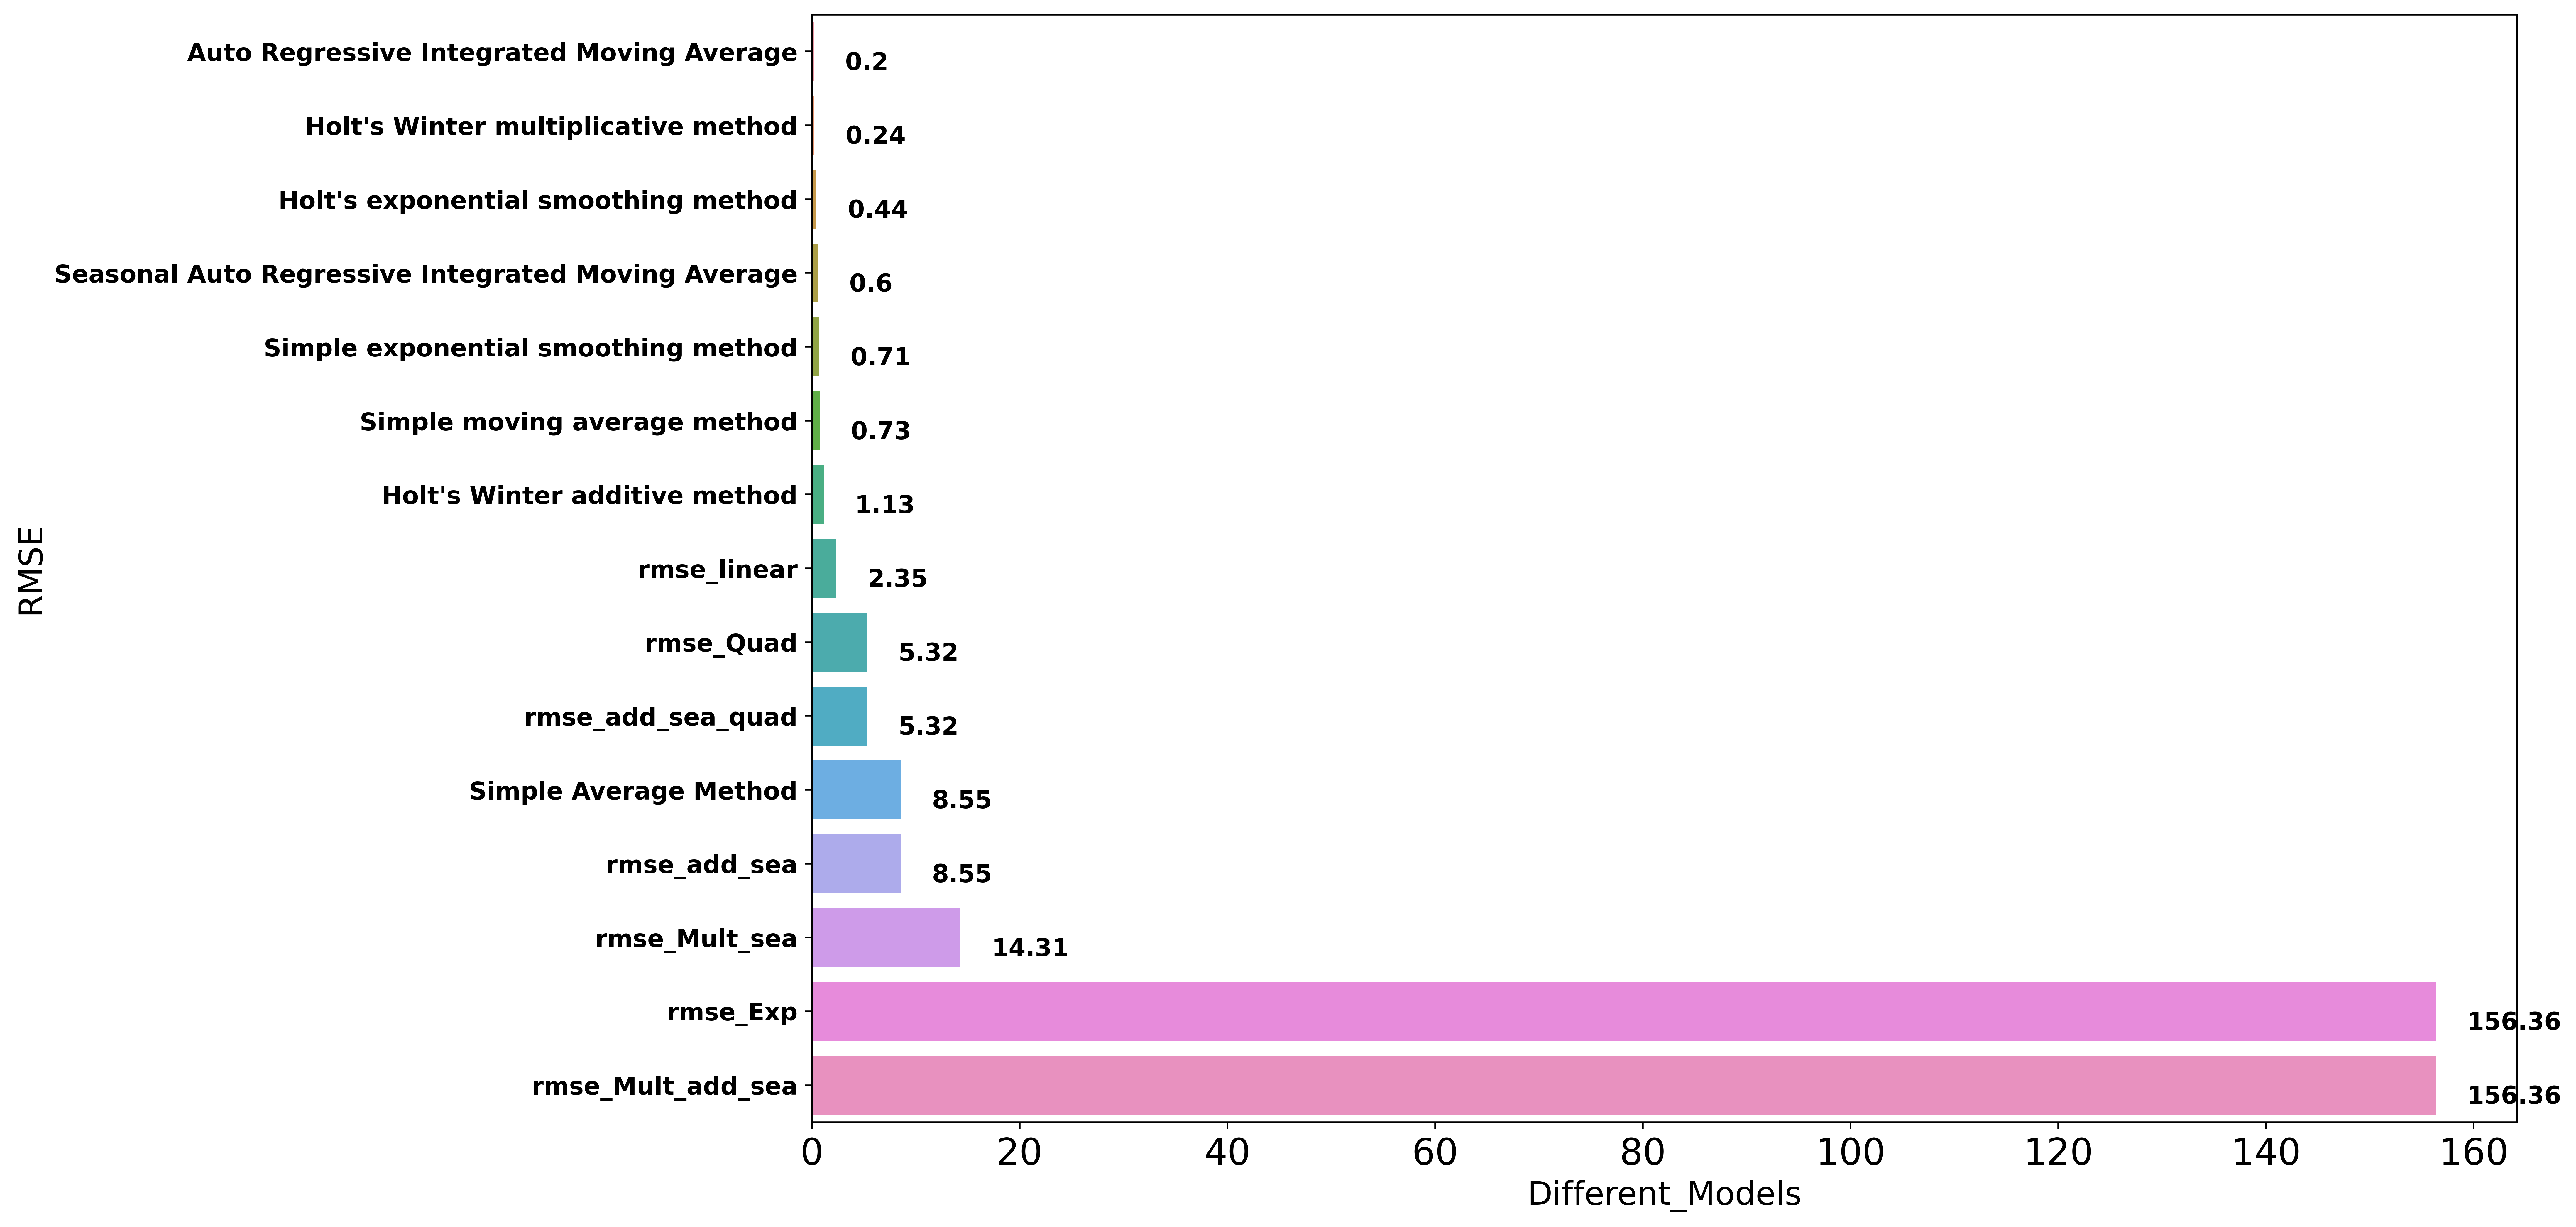

In [140]:
f, axe = plt.subplots(1,1,figsize=(15,10),dpi=500)
sns.barplot(x='RMSE', y='Method', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(e.RMSE.values,2)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()